# The ACLED Dataset of Conflicts in Middle East

## Moses Boudourides

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict, defaultdict
import operator
import datetime
import pickle
import community
from matplotlib import rc
from matplotlib import colors as mcolors
import matplotlib as mpl
import random

In [2]:
df = pd.read_csv("MiddleEast_2017-2018_June12.csv", dtype='unicode')
print "Number of rows =", len(df)
df.head(3)

Number of rows = 68630


ISO EVENT_ID_CNTY EVENT_ID_NO_CNTY       EVENT_DATE  YEAR TIME_PRECISION  \
0  48          BHR2                2  01-January-2017  2017              1   
1  48          BHR1                1  01-January-2017  2017              1   
2  48          BHR3                3  01-January-2017  2017              1   

                      EVENT_TYPE                              ACTOR1  \
0                 Riots/Protests                Protesters (Bahrain)   
1  Battle-No change of territory  Unidentified Armed Group (Bahrain)   
2                 Riots/Protests                   Rioters (Bahrain)   

                   ASSOC_ACTOR_1 INTER1     ...     ADMIN3  LOCATION LATITUDE  \
0                            NaN      6     ...        NaN  Ad Diraz  26.2181   
1                            NaN      3     ...        NaN      Jaww  25.9986   
2  Shiite Muslim Group (Bahrain)      5     ...        NaN    Sitrah  26.1547   

  LONGITUDE GEO_PRECISION            SOURCE   SOURCE_SCALE  \
0   50.4706             1          Press TV       National   
1   50.6167             1  Associated Press  International   
2   50.6206             1          Press TV       National   

                                               NOTES FATALITIES   TIMESTAMP  
0  Bahrainis took to the streets of the village o...          0  1524053890  
1  Gunmen armed with automatic rifles and pistols...          1  1524053890  
2  Clashes broke out between police and Shiite pr...          0  1524053890  

[3 rows x 28 columns]

In [3]:
df.columns

Index([u'ISO', u'EVENT_ID_CNTY', u'EVENT_ID_NO_CNTY', u'EVENT_DATE', u'YEAR',
       u'TIME_PRECISION', u'EVENT_TYPE', u'ACTOR1', u'ASSOC_ACTOR_1',
       u'INTER1', u'ACTOR2', u'ASSOC_ACTOR_2', u'INTER2', u'INTERACTION',
       u'REGION', u'COUNTRY', u'ADMIN1', u'ADMIN2', u'ADMIN3', u'LOCATION',
       u'LATITUDE', u'LONGITUDE', u'GEO_PRECISION', u'SOURCE', u'SOURCE_SCALE',
       u'NOTES', u'FATALITIES', u'TIMESTAMP'],
      dtype='object')

In [4]:
df=df[['EVENT_ID_CNTY','EVENT_DATE','EVENT_TYPE','ACTOR1','ACTOR2']]
print "Number of rows =", len(df)
df=df.dropna()
print "Number of rows (without missing values) =", len(df)

Number of rows = 68630
Number of rows (without missing values) = 43097


In [5]:
df

EVENT_ID_CNTY        EVENT_DATE  \
1              BHR1   01-January-2017   
2              BHR3   01-January-2017   
9             BHR11   11-January-2017   
13            BHR14   14-January-2017   
15            BHR16   16-January-2017   
16            BHR17   18-January-2017   
17            BHR19   23-January-2017   
18            BHR18   23-January-2017   
20            BHR20   25-January-2017   
22            BHR27   26-January-2017   
28            BHR38   27-January-2017   
39            BHR40   28-January-2017   
40           BHR288   28-January-2017   
41            BHR41   29-January-2017   
42            BHR42   30-January-2017   
43            BHR43  01-February-2017   
44            BHR44  01-February-2017   
47            BHR49  03-February-2017   
52            BHR52  03-February-2017   
53            BHR53  04-February-2017   
54            BHR54  09-February-2017   
56            BHR56  09-February-2017   
58            BHR58  12-February-2017   
59            BHR59  12-February-2017   
60            BHR60  12-February-2017   
61            BHR61  12-February-2017   
62            BHR62  12-February-2017   
63            BHR63  12-February-2017   
64            BHR64  12-February-2017   
65            BHR65  12-February-2017   
...             ...               ...   
68591      YEM20625      07-June-2018   
68592      YEM20648      07-June-2018   
68593      YEM20660      07-June-2018   
68594      YEM20673      07-June-2018   
68595      YEM20689      07-June-2018   
68596      YEM20690      07-June-2018   
68597      YEM20707      07-June-2018   
68599      YEM20713      07-June-2018   
68600      YEM20714      07-June-2018   
68601      YEM20728      07-June-2018   
68602      YEM20736      07-June-2018   
68603      YEM20589      08-June-2018   
68604      YEM20596      08-June-2018   
68605      YEM20651      08-June-2018   
68606      YEM20680      08-June-2018   
68607      YEM20706      08-June-2018   
68608      YEM20710      08-June-2018   
68609      YEM20711      08-June-2018   
68610      YEM20712      08-June-2018   
68611      YEM20716      08-June-2018   
68612      YEM20718      08-June-2018   
68613      YEM20719      08-June-2018   
68615      YEM20721      08-June-2018   
68618      YEM20724      08-June-2018   
68621      YEM20731      08-June-2018   
68624      YEM20735      09-June-2018   
68625      YEM20739      09-June-2018   
68626      YEM20740      09-June-2018   
68628      YEM20742      09-June-2018   
68629      YEM20743      09-June-2018   

                                       EVENT_TYPE  \
1                   Battle-No change of territory   
2                                  Riots/Protests   
9                      Violence against civilians   
13                  Battle-No change of territory   
15                  Battle-No change of territory   
16                                 Riots/Protests   
17                  Battle-No change of territory   
18                                 Riots/Protests   
20                                 Riots/Protests   
22                     Violence against civilians   
28                                 Riots/Protests   
39                                 Riots/Protests   
40                     Violence against civilians   
41                     Violence against civilians   
42                                 Riots/Protests   
43                                 Riots/Protests   
44                                 Riots/Protests   
47                                 Riots/Protests   
52                                 Riots/Protests   
53                                Remote violence   
54                  Battle-No change of territory   
56                                 Riots/Protests   
58                                Remote violence   
59                                 Riots/Protests   
60                                 Riots/Protests   
61                                 Riots/Protests   
62                              

In [6]:
# ego="Military Forces of Turkey (2016-)"
# dfe=df.loc[(df['ACTOR1'] == ego) | (df['ACTOR2']==ego)]
# dfe=dfe[['ACTOR1',"ACTOR2","EVENT_DATE","EVENT_TYPE"]]
# dfe


In [7]:
a1=df['ACTOR1'].value_counts()
a1n=sum(pd.isnull(df['ACTOR1']))
a2=df['ACTOR2'].value_counts()
a2n=sum(pd.isnull(df['ACTOR2']))
a12=set(a1.index).intersection(set(a2.index))

print "Number of elements of Actor1 = %i (with no of missing values = %i)" %(len(a1),a1n)
print "Number of elements of Actor2 = %i (with no of missing values = %i)" %(len(a2),a2n)
print "Number of common elements in Actor1 and Actor2 =", len(a12)

Number of elements of Actor1 = 406 (with no of missing values = 0)
Number of elements of Actor2 = 410 (with no of missing values = 0)
Number of common elements in Actor1 and Actor2 = 251


In [8]:
evt=df['EVENT_TYPE'].value_counts()
print "Number of Event_Types =",len(evt)
print
print evt
print
evd=df['EVENT_DATE']
evd=pd.to_datetime(evd)
print "Number of Event_Dates =",len(evd.value_counts())
print "Number of Event_Dates (without missing values) =", len(evd), "starting on", evd.min().strftime("%d-%m-%Y"),  "and ending on",evd.max().strftime("%d-%m-%Y") 

Number of Event_Types = 10

Remote violence                               19610
Battle-No change of territory                 14653
Battle-Government regains territory            2582
Violence against civilians                     2056
Riots/Protests                                 1524
Battle-Non-state actor overtakes territory     1397
Strategic development                          1077
Non-violent transfer of territory               188
Battle-no change of territory                     6
Battles-No change of territory                    4
Name: EVENT_TYPE, dtype: int64

Number of Event_Dates = 891
Number of Event_Dates (without missing values) = 43097 starting on 01-01-2016 and ending on 09-06-2018


In [9]:
df["Week"]=pd.to_datetime(df['EVENT_DATE'])
df

EVENT_ID_CNTY        EVENT_DATE  \
1              BHR1   01-January-2017   
2              BHR3   01-January-2017   
9             BHR11   11-January-2017   
13            BHR14   14-January-2017   
15            BHR16   16-January-2017   
16            BHR17   18-January-2017   
17            BHR19   23-January-2017   
18            BHR18   23-January-2017   
20            BHR20   25-January-2017   
22            BHR27   26-January-2017   
28            BHR38   27-January-2017   
39            BHR40   28-January-2017   
40           BHR288   28-January-2017   
41            BHR41   29-January-2017   
42            BHR42   30-January-2017   
43            BHR43  01-February-2017   
44            BHR44  01-February-2017   
47            BHR49  03-February-2017   
52            BHR52  03-February-2017   
53            BHR53  04-February-2017   
54            BHR54  09-February-2017   
56            BHR56  09-February-2017   
58            BHR58  12-February-2017   
59            BHR59  12-February-2017   
60            BHR60  12-February-2017   
61            BHR61  12-February-2017   
62            BHR62  12-February-2017   
63            BHR63  12-February-2017   
64            BHR64  12-February-2017   
65            BHR65  12-February-2017   
...             ...               ...   
68591      YEM20625      07-June-2018   
68592      YEM20648      07-June-2018   
68593      YEM20660      07-June-2018   
68594      YEM20673      07-June-2018   
68595      YEM20689      07-June-2018   
68596      YEM20690      07-June-2018   
68597      YEM20707      07-June-2018   
68599      YEM20713      07-June-2018   
68600      YEM20714      07-June-2018   
68601      YEM20728      07-June-2018   
68602      YEM20736      07-June-2018   
68603      YEM20589      08-June-2018   
68604      YEM20596      08-June-2018   
68605      YEM20651      08-June-2018   
68606      YEM20680      08-June-2018   
68607      YEM20706      08-June-2018   
68608      YEM20710      08-June-2018   
68609      YEM20711      08-June-2018   
68610      YEM20712      08-June-2018   
68611      YEM20716      08-June-2018   
68612      YEM20718      08-June-2018   
68613      YEM20719      08-June-2018   
68615      YEM20721      08-June-2018   
68618      YEM20724      08-June-2018   
68621      YEM20731      08-June-2018   
68624      YEM20735      09-June-2018   
68625      YEM20739      09-June-2018   
68626      YEM20740      09-June-2018   
68628      YEM20742      09-June-2018   
68629      YEM20743      09-June-2018   

                                       EVENT_TYPE  \
1                   Battle-No change of territory   
2                                  Riots/Protests   
9                      Violence against civilians   
13                  Battle-No change of territory   
15                  Battle-No change of territory   
16                                 Riots/Protests   
17                  Battle-No change of territory   
18                                 Riots/Protests   
20                                 Riots/Protests   
22                     Violence against civilians   
28                                 Riots/Protests   
39                                 Riots/Protests   
40                     Violence against civilians   
41                     Violence against civilians   
42                                 Riots/Protests   
43                                 Riots/Protests   
44                                 Riots/Protests   
47                                 Riots/Protests   
52                                 Riots/Protests   
53                                Remote violence   
54                  Battle-No change of territory   
56                                 Riots/Protests   
58                                Remote violence   
59                                 Riots/Protests   
60                                 Riots/Protests   
61                                 Riots/Protests   
62                              

In [10]:
dfg=df.groupby([pd.Grouper(key='Week',freq="W")])["EVENT_DATE"].count().reset_index().sort_values('Week')
dfg1=df.groupby([pd.Grouper(key='Week',freq="W")])["ACTOR1"].agg(["count","nunique"]).reset_index().sort_values('Week')
dfg2=df.groupby([pd.Grouper(key='Week',freq="W")])["ACTOR2"].agg(["count","nunique"]).reset_index().sort_values('Week')
dfg.rename(columns={'EVENT_DATE': 'No_of_Events'}, inplace=True)
dfg["No_of_Actors1"]=dfg1["nunique"]
dfg["No_of_Actors2"]=dfg2["nunique"]
# dfg

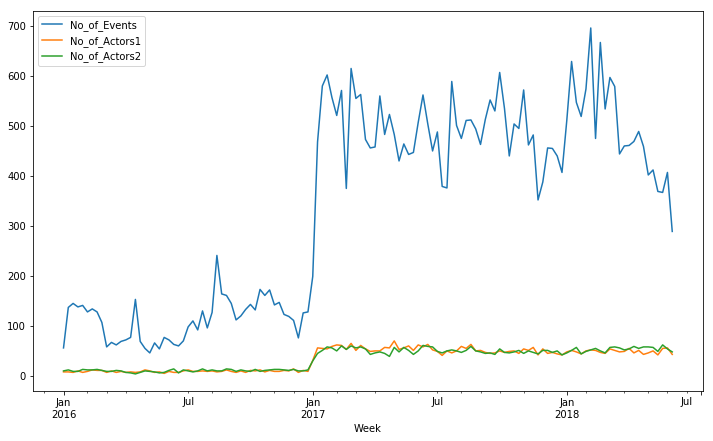

In [11]:
dfg.plot(x="Week",y=["No_of_Events","No_of_Actors1","No_of_Actors2"],figsize=(12,7));

## The ACLED Network of Conflicts in Middle East

In [12]:
# eds=[]
# typedg={}
# for i in range(len(df)):
#     e1=df.iloc[i]["ACTOR1"]
#     e2=df.iloc[i]["ACTOR2"]
#     if e1 in a12:
#         if e2 in a12:
#             if e1!=e2:
#                 eds.append((e1,e2,df.iloc[i]["EVENT_TYPE"],df.iloc[i]["EVENT_DATE"]))

# #                 typedg[(e1,e2)]=df.iloc[i]["EVENT_TYPE"]
# # print eds
# len(eds)

In [13]:
p="ACLED_ME_conflicts_networks_edges.pic"
# with open(p, "wb") as f:
#     pickle.dump(eds, f)
with open(p, "rb") as f:
    eds=pickle.load(f)
    
print "Number of conflicts =", len(eds)

Number of conflicts = 40407


In [14]:
G=nx.MultiGraph()
htw=[]
for k,v in dict(Counter(eds)).items():
    G.add_edge(k[0],k[1],weight=v,typeness=k[2],time=k[3])
print "The multigraph of conflicts has"
print len(G.nodes()), "nodes/actors and" 
print len(G.edges()), "edges/conflicts" 
if nx.is_connected(G)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(G), "connected components"
    
# #251 2013 | 251 935 | Multi: 251 21645   

The multigraph of conflicts has
251 nodes/actors and
21645 edges/conflicts
This graph is connected


In [15]:
for e in G.edges(data=True):
    print e

('Rioters (Iraq)', 'Civilians (Iraq)', {'typeness': 'Riots/Protests', 'weight': 1, 'time': '25-March-2018'})
('Rioters (Iraq)', 'Police Forces of Iraq (2014-) Asayish', {'typeness': 'Riots/Protests', 'weight': 1, 'time': '19-December-2017'})
('Rioters (Iraq)', 'Police Forces of Iraq (2014-) Asayish', {'typeness': 'Riots/Protests', 'weight': 1, 'time': '23-December-2017'})
('Rioters (Iraq)', 'Police Forces of Iraq (2014-) Asayish', {'typeness': 'Riots/Protests', 'weight': 2, 'time': '19-December-2017'})
('Rioters (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Riots/Protests', 'weight': 1, 'time': '30-June-2017'})
('Rioters (Iraq)', 'Police Forces of Iraq (2014-)', {'typeness': 'Riots/Protests', 'weight': 1, 'time': '12-March-2018'})
('Rioters (Iraq)', 'Police Forces of Iraq (2014-)', {'typeness': 'Riots/Protests', 'weight': 1, 'time': '24-May-2017'})
('Rioters (Iraq)', 'Police Forces of Iraq (2014-)', {'typeness': 'Riots/Protests', 'weight': 1, 'time': '11-February-2017'})
('

('Militia (Pro-Government)', 'Military Forces of Yemen (2016-) Supreme Political Council', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '08-May-2018'})
('Militia (Pro-Government)', 'Military Forces of Yemen (2016-) Supreme Political Council', {'typeness': 'Battle-No change of territory', 'weight': 2, 'time': '06-November-2016'})
('Militia (Pro-Government)', 'Military Forces of Yemen (2016-) Supreme Political Council', {'typeness': 'Remote violence', 'weight': 1, 'time': '04-June-2018'})
('Militia (Pro-Government)', 'Military Forces of Yemen (2016-) Supreme Political Council', {'typeness': 'Battle-No change of territory', 'weight': 3, 'time': '26-May-2018'})
('Militia (Pro-Government)', 'Military Forces of Yemen (2016-) Supreme Political Council', {'typeness': 'Remote violence', 'weight': 3, 'time': '06-May-2018'})
('Militia (Pro-Government)', 'Military Forces of Yemen (2016-) Supreme Political Council', {'typeness': 'Battle-No change of territory', 'weight': 1, 't

('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Battle-No change of territory', 'weight': 2, 'time': '13-December-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Battle-Government regains territory', 'weight': 2, 'time': '08-February-2018'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Remote violence', 'weight': 1, 'time': '09-March-2018'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Battle-Government regains territory', 'weight': 1, 'time': '12-February-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Battle-Government regains territory', 'weight': 3, 'time': '29-October-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'M

('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Battle-No change of territory', 'weight': 4, 'time': '21-January-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Battle-No change of territory', 'weight': 7, 'time': '18-July-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '02-March-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Battle-No change of territory', 'weight': 4, 'time': '08-April-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012-)', {'typeness': 'Remote violence', 'weight': 1, 'time': '27-June-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Yemen (2012

('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Saudi Arabia (2015-)', {'typeness': 'Remote violence', 'weight': 11, 'time': '07-April-2018'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Saudi Arabia (2015-)', {'typeness': 'Remote violence', 'weight': 4, 'time': '08-May-2018'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Saudi Arabia (2015-)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '01-April-2018'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Saudi Arabia (2015-)', {'typeness': 'Remote violence', 'weight': 3, 'time': '28-April-2018'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Saudi Arabia (2015-)', {'typeness': 'Remote violence', 'weight': 3, 'time': '27-February-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Military Forces of Saudi Arabia (20

('Military Forces of Yemen (2016-) Supreme Political Council', 'Operation Restoring Hope', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '04-May-2018'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Operation Restoring Hope', {'typeness': 'Remote violence', 'weight': 1, 'time': '17-August-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Operation Restoring Hope', {'typeness': 'Remote violence', 'weight': 3, 'time': '22-January-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Operation Restoring Hope', {'typeness': 'Remote violence', 'weight': 2, 'time': '25-March-2018'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Operation Restoring Hope', {'typeness': 'Remote violence', 'weight': 2, 'time': '17-March-2017'})
('Military Forces of Yemen (2016-) Supreme Political Council', 'Operation Restoring Hope', {'typeness': 'Remote violence', 'weight': 12, 'time': '12-October-2016'})
('Military

('Military Forces of Iraq (2014-)', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 3, 'time': '13-May-2017'})
('Military Forces of Iraq (2014-)', 'Islamic State (Iraq)', {'typeness': 'Battle-No change of territory', 'weight': 2, 'time': '13-March-2017'})
('Military Forces of Iraq (2014-)', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '02-May-2017'})
('Military Forces of Iraq (2014-)', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '05-April-2017'})
('Military Forces of Iraq (2014-)', 'Islamic State (Iraq)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '09-December-2017'})
('Military Forces of Iraq (2014-)', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '12-September-2017'})
('Military Forces of Iraq (2014-)', 'Islamic State (Iraq)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '09-February-2017'})
('Military Forces of Iraq (2014-)',

('Military Forces of Turkey (2016-) Gendarmerie', 'Civilians (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '15-September-2017'})
('Military Forces of Turkey (2016-) Gendarmerie', 'Civilians (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '04-August-2017'})
('Military Forces of Turkey (2016-) Gendarmerie', 'Civilians (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '23-April-2018'})
('Military Forces of Turkey (2016-) Gendarmerie', 'Civilians (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '17-April-2018'})
('Military Forces of Turkey (2016-) Gendarmerie', 'Civilians (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '15-July-2017'})
('Military Forces of Turkey (2016-) Gendarmerie', 'Civilians (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '09-June-2018'})
('Military Forces of Turkey (2016-) Gendarmerie', 'Civilians (Syria)', {'typene

('JTS: Syria Liberation Front', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '21-February-2018'})
('JTS: Syria Liberation Front', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 3, 'time': '15-March-2018'})
('JTS: Syria Liberation Front', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '26-March-2018'})
('JTS: Syria Liberation Front', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '23-March-2018'})
('JTS: Syria Liberation Front', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 2, 'time': '30-March-2018'})
('JTS: Syria Liberation Front', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-Non-state actor overtakes territory', 'weight': 2, 'time': '21-February-2018'})
('JTS: Syria Liberation Front', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-Non-state actor overtak

('Military Forces of Syria (2000-)', 'Opposition Rebels (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '12-April-2018'})
('Military Forces of Syria (2000-)', 'Opposition Rebels (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 3, 'time': '10-November-2017'})
('Military Forces of Syria (2000-)', 'Opposition Rebels (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 6, 'time': '23-March-2018'})
('Military Forces of Syria (2000-)', 'Opposition Rebels (Syria)', {'typeness': 'Remote violence', 'weight': 4, 'time': '22-February-2018'})
('Military Forces of Syria (2000-)', 'Opposition Rebels (Syria)', {'typeness': 'Battle-Government regains territory', 'weight': 2, 'time': '10-April-2017'})
('Military Forces of Syria (2000-)', 'Opposition Rebels (Syria)', {'typeness': 'Remote violence', 'weight': 1, 'time': '25-August-2017'})
('Military Forces of Syria (2000-)', 'Opposition Rebels (Syria)', {'typeness': 'Battle-No change of territory

('Military Forces of Syria (2000-)', 'Islamic State (Syria)', {'typeness': 'Battle-Government regains territory', 'weight': 1, 'time': '09-November-2017'})
('Military Forces of Syria (2000-)', 'Islamic State (Syria)', {'typeness': 'Battle-Government regains territory', 'weight': 1, 'time': '09-February-2017'})
('Military Forces of Syria (2000-)', 'Islamic State (Syria)', {'typeness': 'Remote violence', 'weight': 1, 'time': '27-January-2017'})
('Military Forces of Syria (2000-)', 'Islamic State (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '24-January-2018'})
('Military Forces of Syria (2000-)', 'Islamic State (Syria)', {'typeness': 'Battle-Government regains territory', 'weight': 6, 'time': '27-August-2017'})
('Military Forces of Syria (2000-)', 'Islamic State (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 3, 'time': '29-October-2017'})
('Military Forces of Syria (2000-)', 'Islamic State (Syria)', {'typeness': 'Battle-No change of terri

('Military Forces of Yemen (2012-)', 'Military Forces of Yemen (2015-2016) Supreme Revolutionary Committee', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '28-May-2016'})
('Military Forces of Yemen (2012-)', 'Military Forces of Yemen (2015-2016) Supreme Revolutionary Committee', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '17-April-2016'})
('Military Forces of Yemen (2012-)', 'Military Forces of Yemen (2015-2016) Supreme Revolutionary Committee', {'typeness': 'Battle-No change of territory', 'weight': 2, 'time': '28-July-2016'})
('Military Forces of Yemen (2012-)', 'Military Forces of Yemen (2015-2016) Supreme Revolutionary Committee', {'typeness': 'Battle-No change of territory', 'weight': 6, 'time': '09-August-2016'})
('Military Forces of Yemen (2012-)', 'Military Forces of Yemen (2015-2016) Supreme Revolutionary Committee', {'typeness': 'Battle-Government regains territory', 'weight': 6, 'time': '07-August-2016'})
('Military Forces of Yeme

('QSD: Syrian Democratic Forces', 'Unidentified Armed Group (Syria)', {'typeness': 'Remote violence', 'weight': 1, 'time': '09-October-2017'})
('QSD: Syrian Democratic Forces', 'Unidentified Armed Group (Syria)', {'typeness': 'Remote violence', 'weight': 1, 'time': '31-May-2018'})
('QSD: Syrian Democratic Forces', 'Unidentified Armed Group (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 2, 'time': '24-June-2017'})
('QSD: Syrian Democratic Forces', 'Unidentified Armed Group (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '01-June-2018'})
('QSD: Syrian Democratic Forces', 'Unidentified Armed Group (Syria)', {'typeness': 'Remote violence', 'weight': 1, 'time': '06-February-2017'})
('QSD: Syrian Democratic Forces', 'Unidentified Armed Group (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '14-June-2017'})
('QSD: Syrian Democratic Forces', 'Unidentified Armed Group (Syria)', {'typeness': 'Remote violence', 'weight': 

('Civilians (Syria)', 'Unidentified Armed Group (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '29-May-2017'})
('Civilians (Syria)', 'Unidentified Armed Group (Syria)', {'typeness': 'Remote violence', 'weight': 2, 'time': '08-February-2017'})
('Civilians (Syria)', 'Unidentified Armed Group (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '17-September-2017'})
('Civilians (Syria)', 'Unidentified Armed Group (Syria)', {'typeness': 'Remote violence', 'weight': 1, 'time': '30-June-2017'})
('Civilians (Syria)', 'Unidentified Armed Group (Syria)', {'typeness': 'Remote violence', 'weight': 1, 'time': '03-March-2017'})
('Civilians (Syria)', 'Unidentified Armed Group (Syria)', {'typeness': 'Violence against civilians', 'weight': 1, 'time': '07-January-2018'})
('Civilians (Syria)', 'Unidentified Armed Group (Syria)', {'typeness': 'Remote violence', 'weight': 1, 'time': '27-April-2018'})
('Civilians (Syria)', 'Unidentified Armed Group (Syria)', 

('Unidentified Armed Group (Syria)', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Remote violence', 'weight': 1, 'time': '04-August-2017'})
('Unidentified Armed Group (Syria)', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Remote violence', 'weight': 1, 'time': '27-October-2017'})
('Unidentified Armed Group (Syria)', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '09-May-2018'})
('Unidentified Armed Group (Syria)', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 2, 'time': '21-September-2017'})
('Unidentified Armed Group (Syria)', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Remote violence', 'weight': 1, 'time': '21-September-2017'})
('Unidentified Armed Group (Syria)', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '16-May-2017'})
('Unidentified Armed Group (Syria)', 'HTS: Hayat Tahrir al Sham', {'typeness': 'Battle-No change of territory', 'weight': 1, 'tim

('Global Coalition Against Daesh', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '02-September-2017'})
('Global Coalition Against Daesh', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 2, 'time': '14-October-2017'})
('Global Coalition Against Daesh', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '18-January-2017'})
('Global Coalition Against Daesh', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '09-May-2018'})
('Global Coalition Against Daesh', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '27-May-2018'})
('Global Coalition Against Daesh', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 4, 'time': '10-September-2017'})
('Global Coalition Against Daesh', 'Islamic State (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '22-January-2018'})
('Global Coalition Against Daesh', 'Islamic State (Iraq)', {'typeness': 'Remote 

('Civilians (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '27-April-2018'})
('Civilians (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '23-January-2018'})
('Civilians (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '18-October-2017'})
('Civilians (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '07-June-2018'})
('Civilians (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Remote violence', 'weight': 2, 'time': '29-September-2017'})
('Civilians (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '18-May-2017'})
('Civilians (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Remote violence', 'weight': 1, 'time': '27-September-2017'})
('Civilians (Iraq)', 'Unidentified Armed Group (Iraq)', {'typeness': 'Remote violence', 'weight': 1, '

('Islamic State (Syria)', 'Islamist Militia (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 2, 'time': '09-March-2017'})
('Islamic State (Syria)', 'Islamist Militia (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '25-January-2018'})
('Islamic State (Syria)', 'Islamist Militia (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '03-February-2017'})
('Islamic State (Syria)', 'Islamist Militia (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '23-October-2017'})
('Islamic State (Syria)', 'Islamist Militia (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '21-January-2017'})
('Islamic State (Syria)', 'Islamist Militia (Syria)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '18-January-2018'})
('Islamic State (Syria)', 'Foreign Military Forces', {'typeness': 'Remote violence', 'weight': 1, 'time': '23-September-2017'})
('Islamic State (Syria)', '

('Unidentified Armed Group (Lebanon)', 'Military Forces of Lebanon (2016-)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '16-January-2017'})
('Unidentified Armed Group (Lebanon)', 'Military Forces of Lebanon (2016-)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '20-October-2017'})
('Unidentified Armed Group (Lebanon)', 'Military Forces of Lebanon (2016-)', {'typeness': 'Battle-No change of territory', 'weight': 1, 'time': '07-March-2017'})
('Unidentified Armed Group (Lebanon)', 'Military Forces of Lebanon (2016-)', {'typeness': 'Strategic development', 'weight': 1, 'time': '08-May-2017'})
('Military Forces of Lebanon (2016-)', 'Protesters (Lebanon)', {'typeness': 'Riots/Protests', 'weight': 1, 'time': '30-March-2018'})
('Military Forces of Jordan (1999-)', 'Foreign Military Forces', {'typeness': 'Remote violence', 'weight': 1, 'time': '10-May-2017'})
('Military Forces of Turkey (2016-)', 'Military Forces of Syria (2000-) Syrian Arab Air For

In [16]:
ty=set([e[2]['typeness'] for e in G.edges(data=True)])
print "The multigraph of conflicts includes conflicts of the following", len(ty), "event_types:"
print
for i in ty:
    print i
# print
# nty=[ev for ev in evt.index if ev not in ty]
# print "This graph does not include conflicts of the following", len(nty), "event_type:"
# for i in nty:
#     print i

The multigraph of conflicts includes conflicts of the following 10 event_types:

Battle-Non-state actor overtakes territory
Violence against civilians
Battles-No change of territory
Battle-No change of territory
Remote violence
Non-violent transfer of territory
Battle-no change of territory
Battle-Government regains territory
Strategic development
Riots/Protests


In [17]:
ti=set([e[2]['time'] for e in G.edges(data=True)])
print "The multigraph of conflicts includes conflicts on", len(ti), "event_dates"
# print
# nti=[ev for ev in evd.index if ev not in ti]
# print "This graph does not include conflicts on the following", len(nti), "event_date:"
# for i in nti:
#     print i

The multigraph of conflicts includes conflicts on 891 event_dates


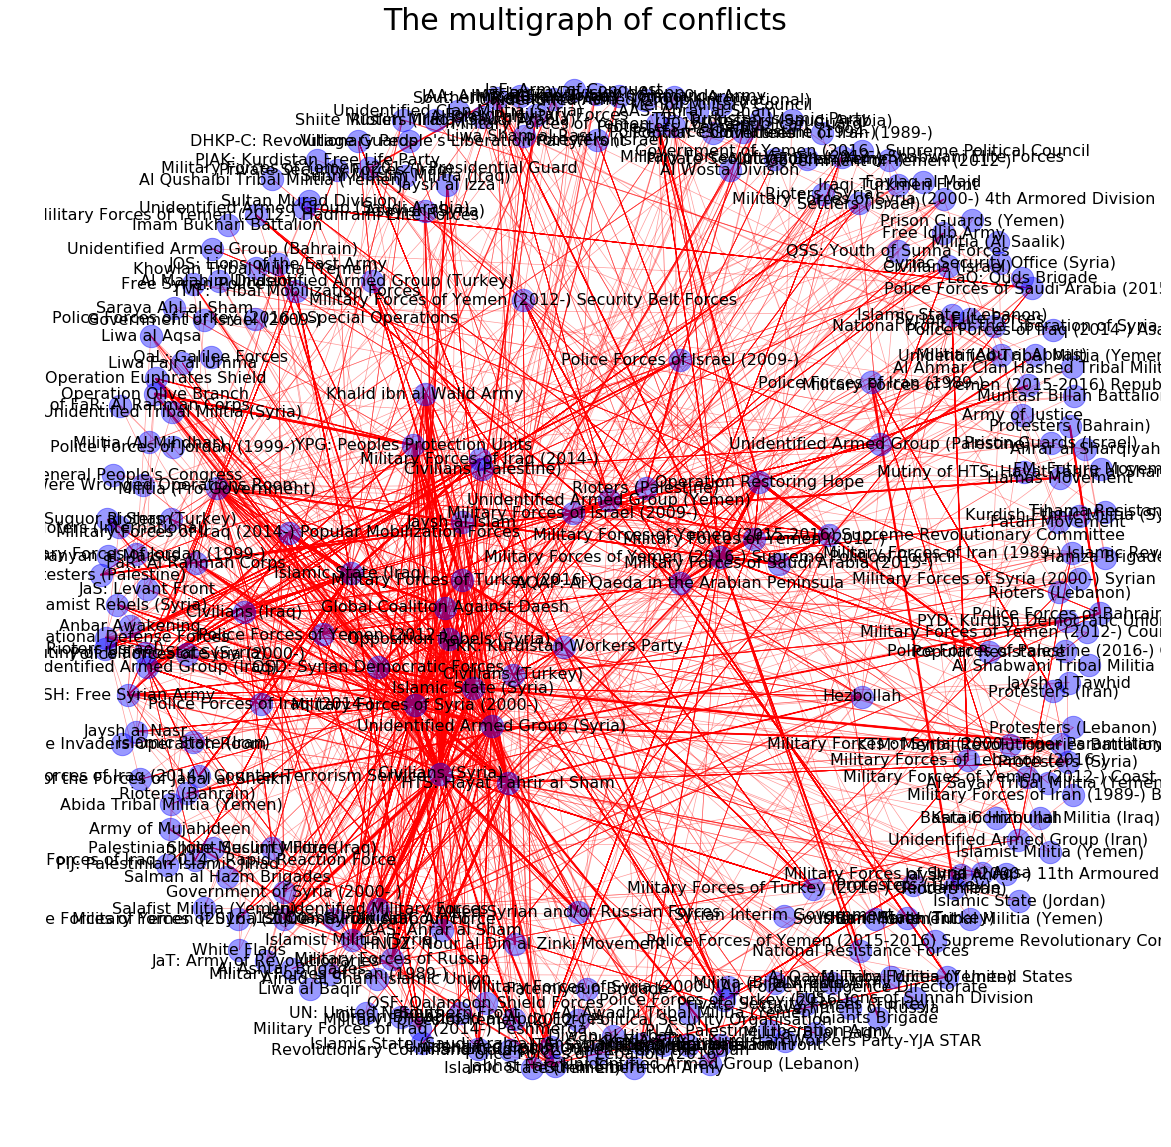

In [18]:
pos=nx.spring_layout(G,scale=1.,k=3.) #,scale=1.8,k=0.5) #1.5,k=.1) #scale=1.5,k=.1
edgewidth=[]
for (u,v,d) in G.edges(data=True):
    edgewidth.append(math.log(1+d['weight']))
labels={}
for i in G.nodes():
    labels[i]=i
    
fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(G,pos=pos,node_color='b',node_size=500,font_size=20,alpha=0.4);
nx.draw_networkx_edges(G,pos=pos,edge_color='r',width=edgewidth,alpha=0.4);
nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=16);
sst="The multigraph of conflicts"
fig.suptitle(sst,x=0.5, y=.90, fontsize=30);
plt.axis('off');
plt.show()

In [19]:
# fop=open("ACLED_ME_conflicts.pic","w")
# pickle.dump([G.nodes(data=True),G.edges(data=True)],fop)
# fop.close()

In [20]:
centralities=pd.read_csv('ACLED_ME_conflicts_networks_centralities.csv') 
centralities=centralities[[u'node', u'degree', u'closeness', u'betweenness',
       u'eigenvector', u'HITS', u'Katz', u'PageRank', u'load',
       u'communicability', u'current flow']]
centralities.sort_values("PageRank", inplace=True, ascending=False)
centralities

node  degree  closeness  \
239                   Unidentified Armed Group (Syria)   0.300   0.475285   
114                   Military Forces of Syria (2000-)   0.264   0.454545   
54                           HTS: Hayat Tahrir al Sham   0.192   0.449640   
31                                   Civilians (Syria)   0.200   0.441696   
135  Military Forces of Yemen (2016-) Supreme Polit...   0.140   0.401929   
66                               Islamic State (Syria)   0.208   0.453721   
153                          Opposition Rebels (Syria)   0.156   0.426621   
141                           Militia (Pro-Government)   0.172   0.471698   
3              AQAP: Al Qaeda in the Arabian Peninsula   0.104   0.391236   
121                  Military Forces of Turkey (2016-)   0.128   0.431034   
152                           Operation Restoring Hope   0.088   0.376506   
241                   Unidentified Armed Group (Yemen)   0.108   0.367647   
46                      Global Coalition Against Daesh   0.104   0.420875   
109                  Military Forces of Israel (2009-)   0.100   0.396197   
124                   Military Forces of Yemen (2012-)   0.088   0.364431   
244                       Unidentified Military Forces   0.116   0.464684   
250                      YPG: Peoples Protection Units   0.108   0.418060   
62                                Islamic State (Iraq)   0.076   0.332889   
28                                    Civilians (Iraq)   0.084   0.402576   
195                      QSD: Syrian Democratic Forces   0.108   0.415282   
58                                           Hezbollah   0.080   0.396197   
133  Military Forces of Yemen (2015-2016) Supreme R...   0.064   0.357143   
235                    Unidentified Armed Group (Iraq)   0.080   0.344353   
175                     Police Forces of Yemen (2012-)   0.080   0.359195   
1                                   AAS: Ahrar al Sham   0.080   0.405186   
83                                Jabhat Fateh al Sham   0.064   0.389408   
112                          Military Forces of Russia   0.096   0.416667   
93                            Khalid ibn al Walid Army   0.064   0.396197   
161                   Police Forces of Bahrain (1999-)   0.016   0.189825   
118  Military Forces of Syria (2000-) Syrian Arab A...   0.088   0.420875   
..                                                 ...     ...        ...   
77                   JTS: Syrian Revolutionaries Front   0.008   0.330251   
78                               JaF: Army of Conquest   0.008   0.330251   
2                                   AAS: Ahrar al-Sham   0.008   0.339674   
34                                     Diwan al Hisbah   0.008   0.320513   
225                                Syrian Elite Forces   0.008   0.323834   
224                     Syriac Security Office (Syria)   0.008   0.325521   
200  Revolutionary Command Council of Quneitra and ...   0.008   0.323834   
216               Shiite Muslim Militia (Saudi Arabia)   0.004   0.227894   
33   DHKP-C: Revolutionary People's Liberation Part...   0.004   0.241779   
14                  Al Qushaibi Tribal Militia (Yemen)   0.004   0.287026   
52   Government of Yemen (2016-) Supreme Political ...   0.004   0.287026   
10                    Al Awadhi Tribal Militia (Yemen)   0.004   0.287026   
15                     Al Sayar Tribal Militia (Yemen)   0.004   0.267380   
16                  Al Shabwani Tribal Militia (Yemen)   0.004   0.281532   
13                     Al Qayfa Tribal Militia (Yemen)   0.004   0.263435   
27                       Basra Communal Militia (Iraq)   0.004   0.287356   
156     PKK-YJA STAR: Kurdistan Workers Party-YJA STAR   0.004   0.301568   
35                                 FM: Future Movement   0.004   0.284091   
97                                   Liwa Fajr al Umma   0.004   0.312891   
143                                 Mutaaz Billah Army   0.004   0.322581   
147         National Front for the Liberation 

In [21]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Military Forces of Yemen (2016-) Supreme Political Council', 3956),
 ('Military Forces of Syria (2000-)', 3711),
 ('Islamic State (Iraq)', 3089),
 ('Civilians (Syria)', 2651),
 ('Military Forces of Yemen (2012-)', 2548),
 ('Islamic State (Syria)', 2434),
 ('Unidentified Armed Group (Syria)', 1449),
 ('Opposition Rebels (Syria)', 1295),
 ('Operation Restoring Hope', 1192),
 ('Civilians (Iraq)', 1062),
 ('QSD: Syrian Democratic Forces', 1048),
 ('Military Forces of Turkey (2016-)', 1030),
 ('Military Forces of Saudi Arabia (2015-)', 1029),
 ('Military Forces of Iraq (2014-)', 976),
 ('HTS: Hayat Tahrir al Sham', 941),
 ('Military Forces of Yemen (2015-2016) Supreme Revolutionary Committee', 905),
 ('Military Forces of Israel (2009-)', 799),
 ('Global Coalition Against Daesh', 748),
 ('Military Forces of Iraq (2014-) Popular Mobilization Forces', 735),
 ('PKK: Kurdistan Workers Party', 704),
 ('Unidentified Armed Group (Iraq)', 679),
 ('AQAP: Al Qaeda in the Arabian Peninsula', 579),
 

## The ACLED Network over a Month

In [22]:
mdate="November-2017" #'March-2018' #"May-2017"
edl=[ed for ed in G.edges(data=True) if mdate in ed[2]['time']]
print len(edl)
Gm=nx.MultiGraph(edl)
print len(Gm)

1041
119


In [23]:
ti=set([e[2]['time'] for e in Gm.edges(data=True)])
print "The multigraph of conflicts during", mdate, "includes", "conflicts on", len(ti), "event_dates"
print
# nti=[ev for ev in evd.index if ev not in ti]
# print "This graph does not include conflicts on the following", len(nty), "event_date:"
# for i in nti:
#     print i

The multigraph of conflicts during November-2017 includes conflicts on 30 event_dates



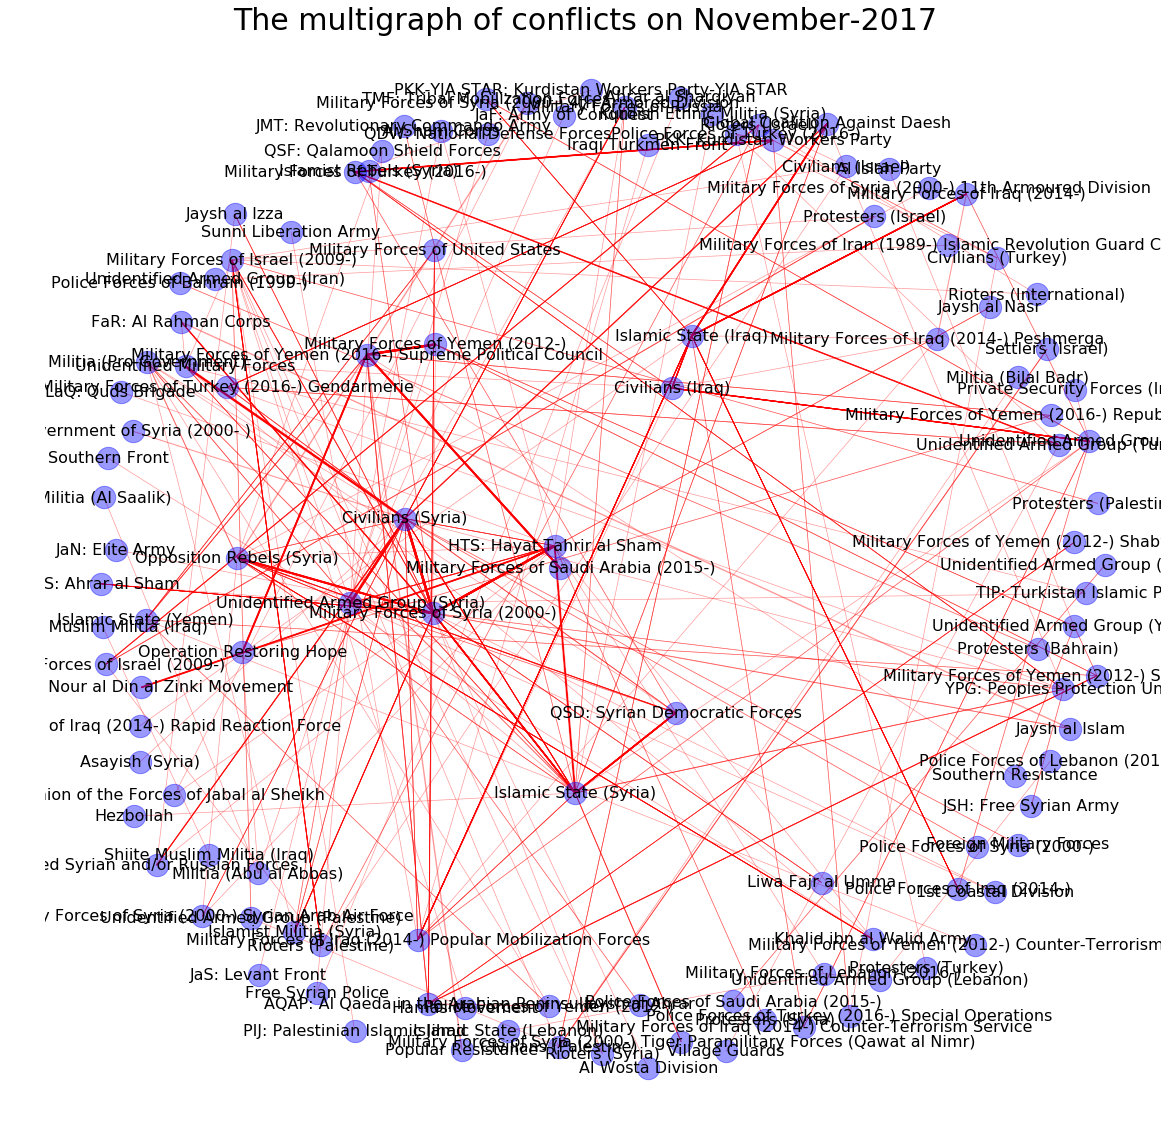

In [24]:
posm=nx.spring_layout(Gm,scale=1.,k=3.) #,scale=1.8,k=0.5) #1.5,k=.1) #scale=1.5,k=.1
edgewidthm=[]
for (u,v,d) in Gm.edges(data=True):
    edgewidthm.append(math.log(1+d['weight']))
labelsm={}
for i in Gm.nodes():
    labelsm[i]=i
    
fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(111)
nx.draw_networkx_nodes(Gm,pos=posm,node_color='b',node_size=500,font_size=20,alpha=0.4);
nx.draw_networkx_edges(Gm,pos=posm,edge_color='r',width=edgewidthm,alpha=0.4);
nx.draw_networkx_labels(Gm,pos=posm,labels=labelsm,font_size=16);
sst="The multigraph of conflicts on "+mdate
fig.suptitle(sst,x=0.5, y=.90, fontsize=30);
plt.axis('off');
plt.show()

## Egocentric Subgraphs of the ACLED Network

In [25]:
ego= "Military Forces of Turkey (2016-)" # 'Rioters (Bahrain)' #'Protesters (Israel)' #'Popular Resistance' #'Operation Restoring Hope' #'Islamic State (Syria)' #'Islamist Militia (Syria)' #'Rioters (Israel)' 

eneigh=[ego]
for e in G.edges(data=True):
    if e[0]==ego: #e[2]["ACTOR1"]==ego:
        eneigh.append(e[1]) #e[2]["node2"])
    if e[1]==ego: #e[2]["ACTOR2"]==ego:
        eneigh.append(e[0]) #e[2]["node2"])
Gen=G.subgraph(eneigh) 
print "The egocentric subgraph around", ego, "has"
print len(Gen.nodes()), "nodes/actors"
print len(Gen.edges()), "edges/conflicts"

The egocentric subgraph around Military Forces of Turkey (2016-) has
33 nodes/actors
7414 edges/conflicts


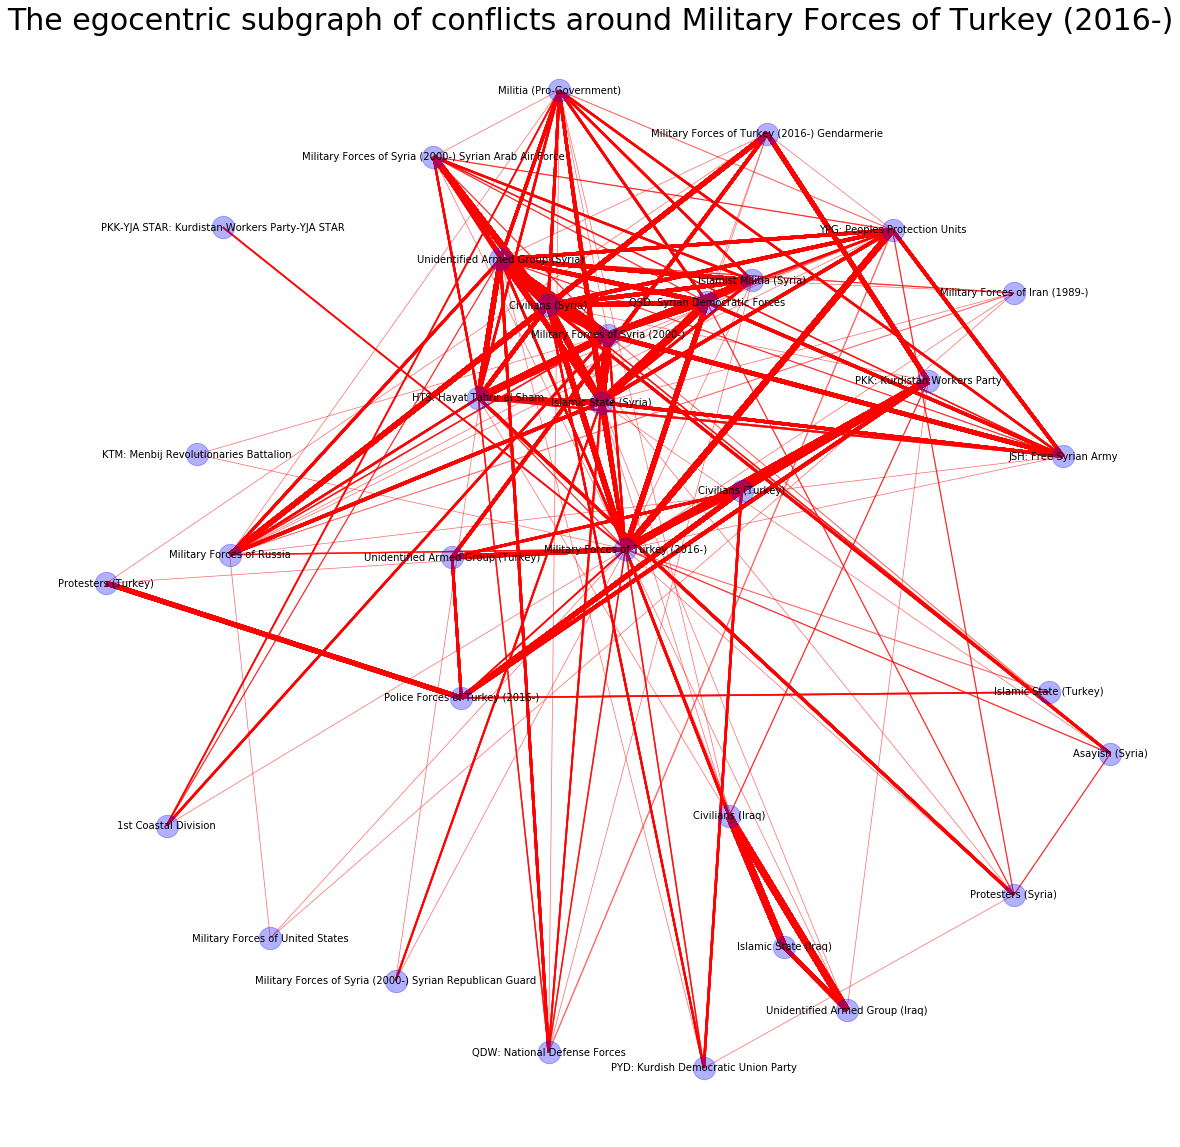

In [26]:
posen=nx.spring_layout(Gen,scale=1.,k=5.)

def centeroidpython(data):
    x, y = zip(*data)
    l = len(x)
    return sum(x) / l, sum(y) / l

data=[v for k,v in posen.items()]
# print centeroidpython(data)

posen[ego] = np.array(centeroidpython(data))
# print pose["Greece"]
for k, v in posen.items():
    if k!=ego:
        ra=np.sqrt((v[0]-posen[ego][0])**2+(v[1]-posen[ego][1])**2)
        if ra<0.2:
            v[0]=v[0]*3.
            v[1]=v[1]*3.
            
edgewidth_en=[]
# colors_es=[]
ewd=defaultdict()
for (u,v,d) in Gen.edges(data=True):
#     edgewidth_es.append(d['weight'])
#     colors_es.append(math.log(d['weight']))
    if (u,v) not in ewd:
        ewd[(u,v)]=[d['weight']]
    else:
        ewd[(u,v)].append(d['weight'])
#     ewd[(u,v)].append(d['weight'])
for (u,v,d) in Gen.edges(data=True):
    edgewidth_en.append(math.log(1+sum(ewd[(u,v)])))
labels_en={}
for i in Gen.nodes():
    labels_en[i]=i
edlabels_en={}
for i in Gen.edges(data=True):
    edlabels_en[(i[0],i[1])]=i[2]['time']
#     print i[2]['EVENT_DATE']
# edlabels_es
plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(Gen,pos=posen,node_size=500,node_color='b',alpha=0.3);
ed=nx.draw_networkx_edges(Gen,pos=posen,edge_color="r",width=edgewidth_en,alpha=0.6); #,arrowsize=20);
# edge_color=colors_es,edge_cmap=plt.cm.cool,width=edgewidth_es,
nx.draw_networkx_labels(Gen,pos=posen,labels=labels_en,font_size=10);  #viridis
# nx.draw_networkx_edge_labels(Ges,pos=poses,edge_labels=edlabels_es)
# plt.colorbar(ed) #, orientation='horizontal')
sst="The egocentric subgraph of conflicts around "+ego
plt.suptitle(sst,x=0.5, y=0.9, fontsize=30);
plt.axis('off');
plt.show()

In [27]:
print "The", len(Gen.edges()), "edges/conflicts between", ego, "and alters/combatants have the following attributes:"
print
da=["January-2017","February-2017","March-2017","April-2017","May-2017","June-2017","July-2017",
    "August-2017","September-2017","October-2017","November-2017","December-2017",
   "January-2018","February-2018","March-2018","April-2018","May-2018","June-2018"]
u=0
for d in da:
    for e in Gen.edges(data=True):
        if d in e[2]['time']:
            print "(%i) %s -- %s" %(u+1,e[1],e[0])
            u+=1
            print "weight =", e[2]['weight']
            print "event_date =", e[2]['time']
            print "event_type =", e[2]['typeness']
            print

The 7414 edges/conflicts between Military Forces of Turkey (2016-) and alters/combatants have the following attributes:

(1) PKK: Kurdistan Workers Party -- Police Forces of Turkey (2016-)
weight = 8
event_date = 18-January-2017
event_type = Battle-No change of territory

(2) PKK: Kurdistan Workers Party -- Police Forces of Turkey (2016-)
weight = 1
event_date = 16-January-2017
event_type = Remote violence

(3) PKK: Kurdistan Workers Party -- Police Forces of Turkey (2016-)
weight = 1
event_date = 11-January-2017
event_type = Battle-No change of territory

(4) PKK: Kurdistan Workers Party -- Police Forces of Turkey (2016-)
weight = 1
event_date = 22-January-2017
event_type = Remote violence

(5) PKK: Kurdistan Workers Party -- Police Forces of Turkey (2016-)
weight = 1
event_date = 01-January-2017
event_type = Battle-No change of territory

(6) PKK: Kurdistan Workers Party -- Police Forces of Turkey (2016-)
weight = 2
event_date = 12-January-2017
event_type = Battle-No change of territ

event_type = Battle-Government regains territory

(96) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 26-January-2017
event_type = Battle-Government regains territory

(97) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 12
event_date = 14-January-2017
event_type = Battle-No change of territory

(98) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 06-January-2017
event_type = Battle-No change of territory

(99) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 03-January-2017
event_type = Battle-No change of territory

(100) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 5
event_date = 02-January-2017
event_type = Battle-No change of territory

(101) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 07-January-2017
event_type = Battle-No change of territory

(102) Islamic State (Syria) -- Military Forces of Syria (20

event_date = 15-January-2017
event_type = Battle-No change of territory

(228) Unidentified Armed Group (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 13-January-2017
event_type = Remote violence

(229) Unidentified Armed Group (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 12-January-2017
event_type = Remote violence

(230) Unidentified Armed Group (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 13-January-2017
event_type = Battle-No change of territory

(231) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 1
event_date = 18-January-2017
event_type = Remote violence

(232) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 4
event_date = 23-January-2017
event_type = Remote violence

(233) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 3
event_date = 14-January-2017
event_type = Remote violence

(234) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 1
event_date = 20-Januar

weight = 1
event_date = 21-January-2017
event_type = Remote violence

(347) Islamic State (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 31-January-2017
event_type = Remote violence

(348) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 25-January-2017
event_type = Remote violence

(349) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 19-January-2017
event_type = Remote violence

(350) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 17-January-2017
event_type = Violence against civilians

(351) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 05-January-2017
event_type = Violence against civilians

(352) Islamic State (Iraq) -- Civilians (Iraq)
weight = 4
event_date = 22-January-2017
event_type = Remote violence

(353) Islamic State (Iraq) -- Civilians (Iraq)
weight = 4
event_date = 09-January-2017
event_type = Remote violence

(354) Islamic State (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 29-January-2017
ev

weight = 6
event_date = 24-February-2017
event_type = Remote violence

(488) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 8
event_date = 01-February-2017
event_type = Battle-No change of territory

(489) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 16-February-2017
event_type = Battle-No change of territory

(490) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 04-February-2017
event_type = Battle-Government regains territory

(491) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 17-February-2017
event_type = Remote violence

(492) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 4
event_date = 26-February-2017
event_type = Battle-No change of territory

(493) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 23-February-2017
event_type = Battle-No change of territory

(494) Islamic State (Syria) -- Military For

event_type = Remote violence

(631) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 18-February-2017
event_type = Remote violence

(632) Civilians (Syria) -- Militia (Pro-Government)
weight = 1
event_date = 03-February-2017
event_type = Remote violence

(633) Islamic State (Syria) -- Militia (Pro-Government)
weight = 1
event_date = 17-February-2017
event_type = Remote violence

(634) Islamic State (Syria) -- Militia (Pro-Government)
weight = 1
event_date = 08-February-2017
event_type = Strategic development

(635) JSH: Free Syrian Army -- Militia (Pro-Government)
weight = 1
event_date = 26-February-2017
event_type = Battle-No change of territory

(636) Unidentified Armed Group (Syria) -- Militia (Pro-Government)
weight = 1
event_date = 01-February-2017
event_type = Battle-No change of territory

(637) Unidentified Armed Group (Syria) -- Militia (Pro-Government)
weight = 1
event_date = 06-February-2017
event_type = Remote violence

(638) 1st Coastal

(765) Military Forces of Russia -- Civilians (Syria)
weight = 1
event_date = 28-February-2017
event_type = Remote violence

(766) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 26-February-2017
event_type = Battle-No change of territory

(767) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 26-February-2017
event_type = Battle-No change of territory

(768) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 3
event_date = 26-February-2017
event_type = Remote violence

(769) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 21-February-2017
event_type = Remote violence

(770) Islamic State (Syria) -- YPG: Peoples Protection Units
weight = 1
event_date = 22-February-2017
event_type = Battle-No change of territory

(771) Islamic State (Syria) -- YPG: Peoples Protection Units
weight = 1
event_date = 14-February-2017
event_type = Battle-No c

event_type = Battle-No change of territory

(849) Unidentified Armed Group (Syria) -- Islamic State (Syria)
weight = 1
event_date = 27-February-2017
event_type = Strategic development

(850) Military Forces of Russia -- Islamic State (Syria)
weight = 1
event_date = 23-February-2017
event_type = Remote violence

(851) Military Forces of Russia -- Islamic State (Syria)
weight = 1
event_date = 17-February-2017
event_type = Remote violence

(852) Military Forces of Syria (2000-) Syrian Republican Guard -- Islamic State (Syria)
weight = 1
event_date = 11-February-2017
event_type = Battle-No change of territory

(853) Unidentified Armed Group (Turkey) -- Civilians (Turkey)
weight = 1
event_date = 13-February-2017
event_type = Remote violence

(854) Unidentified Armed Group (Turkey) -- Civilians (Turkey)
weight = 1
event_date = 25-February-2017
event_type = Remote violence

(855) Islamist Militia (Syria) -- Military Forces of Syria (2000-) Syrian Arab Air Force
weight = 4
event_date = 22-Febr

event_date = 09-March-2017
event_type = Battle-No change of territory

(1013) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 26-March-2017
event_type = Battle-No change of territory

(1014) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 14-March-2017
event_type = Battle-No change of territory

(1015) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 4
event_date = 18-March-2017
event_type = Battle-No change of territory

(1016) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 04-March-2017
event_type = Battle-No change of territory

(1017) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 18-March-2017
event_type = Battle-No change of territory

(1018) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 08-March-2017
event_type = Battle-Government regains territory

(1019) Islamist Militia

event_date = 24-March-2017
event_type = Battle-No change of territory

(1138) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 3
event_date = 21-March-2017
event_type = Battle-No change of territory

(1139) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 11-March-2017
event_type = Battle-Non-state actor overtakes territory

(1140) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 02-March-2017
event_type = Remote violence

(1141) JSH: Free Syrian Army -- QSD: Syrian Democratic Forces
weight = 1
event_date = 03-March-2017
event_type = Battle-Non-state actor overtakes territory

(1142) JSH: Free Syrian Army -- QSD: Syrian Democratic Forces
weight = 1
event_date = 05-March-2017
event_type = Remote violence

(1143) JSH: Free Syrian Army -- QSD: Syrian Democratic Forces
weight = 1
event_date = 09-March-2017
event_type = Battle-No change of territory

(1144) JSH: Free Syrian Army -- QSD: Syrian Democratic Forces
weigh

weight = 1
event_date = 20-March-2017
event_type = Violence against civilians

(1256) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 09-March-2017
event_type = Remote violence

(1257) Islamic State (Iraq) -- Civilians (Iraq)
weight = 4
event_date = 02-March-2017
event_type = Remote violence

(1258) Islamic State (Iraq) -- Civilians (Iraq)
weight = 3
event_date = 02-March-2017
event_type = Violence against civilians

(1259) Islamic State (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 27-March-2017
event_type = Remote violence

(1260) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 12-March-2017
event_type = Remote violence

(1261) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 23-March-2017
event_type = Remote violence

(1262) Islamic State (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 06-March-2017
event_type = Remote violence

(1263) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 08-March-2017
event_type =

weight = 2
event_date = 26-April-2017
event_type = Remote violence

(1386) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 06-April-2017
event_type = Remote violence

(1387) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 05-April-2017
event_type = Remote violence

(1388) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 4
event_date = 03-April-2017
event_type = Remote violence

(1389) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 29-April-2017
event_type = Violence against civilians

(1390) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 24-April-2017
event_type = Remote violence

(1391) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 02-April-2017
event_type = Violence against civilians

(1392) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 5
event_date = 14-April-2017
event_type = Remote violence

(1393) 

(1488) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 16-April-2017
event_type = Battle-No change of territory

(1489) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 15-April-2017
event_type = Remote violence

(1490) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 11-April-2017
event_type = Battle-No change of territory

(1491) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 02-April-2017
event_type = Remote violence

(1492) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 24-April-2017
event_type = Battle-No change of territory

(1493) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 03-April-2017
event_type = Battle-No change of territory

(1494) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weig

weight = 1
event_date = 09-April-2017
event_type = Battle-Non-state actor overtakes territory

(1624) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 29-April-2017
event_type = Remote violence

(1625) Islamist Militia (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 27-April-2017
event_type = Battle-No change of territory

(1626) Islamist Militia (Syria) -- QSD: Syrian Democratic Forces
weight = 2
event_date = 27-April-2017
event_type = Remote violence

(1627) Unidentified Armed Group (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 16-April-2017
event_type = Remote violence

(1628) Unidentified Armed Group (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 09-April-2017
event_type = Battle-No change of territory

(1629) Unidentified Armed Group (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 11-April-2017
event_type = Remote violence

(1630) Unidentified Armed Group (Syria) -- QSD: Syrian Dem

weight = 1
event_date = 14-April-2017
event_type = Remote violence

(1755) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 09-April-2017
event_type = Strategic development

(1756) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 4
event_date = 13-April-2017
event_type = Remote violence

(1757) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 08-April-2017
event_type = Remote violence

(1758) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 05-April-2017
event_type = Remote violence

(1759) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 04-April-2017
event_type = Remote violence

(1760) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 11-April-2017
event_type = Remote violence

(1761) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 07-April-2017
event_type = Remote violence

(1762) Unidentified Armed Group (Iraq

weight = 1
event_date = 06-May-2017
event_type = Battle-No change of territory

(1903) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 10-May-2017
event_type = Battle-No change of territory

(1904) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 26-May-2017
event_type = Battle-No change of territory

(1905) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 15-May-2017
event_type = Battle-No change of territory

(1906) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 14-May-2017
event_type = Battle-No change of territory

(1907) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 21-May-2017
event_type = Battle-No change of territory

(1908) Islamist Militia (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 16-May-2017
event_type = Battle-No change of territory

(1909) Islamist Militia (Syria) 

event_date = 10-May-2017
event_type = Battle-No change of territory

(2079) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 01-May-2017
event_type = Battle-Non-state actor overtakes territory

(2080) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 2
event_date = 24-May-2017
event_type = Battle-No change of territory

(2081) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 17-May-2017
event_type = Battle-No change of territory

(2082) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 2
event_date = 03-May-2017
event_type = Battle-No change of territory

(2083) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 24-May-2017
event_type = Battle-No change of territory

(2084) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 13-May-2017
event_type = Battle-Non-state actor overtakes territory

(2085) JSH: Free Syrian Army -- QSD: Syrian Democrati

weight = 1
event_date = 29-May-2017
event_type = Violence against civilians

(2219) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 08-May-2017
event_type = Remote violence

(2220) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 22-May-2017
event_type = Remote violence

(2221) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 11-May-2017
event_type = Violence against civilians

(2222) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 18-May-2017
event_type = Remote violence

(2223) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 17-May-2017
event_type = Remote violence

(2224) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 07-May-2017
event_type = Violence against civilians

(2225) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 22-May-2017
event_type = Violence against civilians

(2226) Unidenti


(2305) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 4
event_date = 14-June-2017
event_type = Remote violence

(2306) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 19-June-2017
event_type = Non-violent transfer of territory

(2307) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 17-June-2017
event_type = Battle-Government regains territory

(2308) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 11-June-2017
event_type = Battle-No change of territory

(2309) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 07-June-2017
event_type = Battle-No change of territory

(2310) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 11
event_date = 15-June-2017
event_type = Battle-No change of territory

(2311) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 5
event_date = 04-June-2017
event_type = Battle-No chang

(2414) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 20-June-2017
event_type = Remote violence

(2415) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 28-June-2017
event_type = Battle-Government regains territory

(2416) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 02-June-2017
event_type = Remote violence

(2417) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 24-June-2017
event_type = Battle-No change of territory

(2418) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 24-June-2017
event_type = Battle-Government regains territory

(2419) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 07-June-2017
event_type = Battle-Government regains territory

(2420) Unidentified Armed Group (Syria) -- Military Forces of Syria 

(2510) Military Forces of Turkey (2016-) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 21-June-2017
event_type = Strategic development

(2511) Military Forces of Turkey (2016-) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 20-June-2017
event_type = Battle-No change of territory

(2512) Military Forces of Turkey (2016-) -- QSD: Syrian Democratic Forces
weight = 3
event_date = 13-June-2017
event_type = Remote violence

(2513) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 5
event_date = 10-June-2017
event_type = Battle-No change of territory

(2514) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 14-June-2017
event_type = Battle-Non-state actor overtakes territory

(2515) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 25-June-2017
event_type = Battle-No change of territory

(2516) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 25-June-2017
event_type = Bat

event_type = Remote violence

(2622) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 04-June-2017
event_type = Violence against civilians

(2623) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 18-June-2017
event_type = Remote violence

(2624) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 29-June-2017
event_type = Violence against civilians

(2625) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
event_date = 04-June-2017
event_type = Remote violence

(2626) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 03-June-2017
event_type = Remote violence

(2627) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
event_date = 22-June-2017
event_type = Remote violence

(2628) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 21-June-2017
event_type = Remote violence

(2629) Unidentified Armed Group (Syria) -- Civilians

weight = 1
event_date = 18-June-2017
event_type = Battle-No change of territory

(2706) Unidentified Armed Group (Turkey) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 12-June-2017
event_type = Remote violence

(2707) Unidentified Armed Group (Turkey) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 10-June-2017
event_type = Remote violence

(2708) Unidentified Armed Group (Syria) -- Islamic State (Syria)
weight = 1
event_date = 30-June-2017
event_type = Remote violence

(2709) Unidentified Armed Group (Syria) -- Islamic State (Syria)
weight = 1
event_date = 19-June-2017
event_type = Battle-No change of territory

(2710) Unidentified Armed Group (Syria) -- Islamic State (Syria)
weight = 1
event_date = 20-June-2017
event_type = Battle-No change of territory

(2711) Unidentified Armed Group (Syria) -- Islamic State (Syria)
weight = 1
event_date = 25-June-2017
event_type = Battle-No change of territory

(2712) Unidentified Armed Group (Syria) -- Islamic State (S

weight = 3
event_date = 22-July-2017
event_type = Battle-No change of territory

(2808) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 4
event_date = 29-July-2017
event_type = Battle-No change of territory

(2809) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 4
event_date = 07-July-2017
event_type = Battle-No change of territory

(2810) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 4
event_date = 01-July-2017
event_type = Battle-No change of territory

(2811) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 5
event_date = 04-July-2017
event_type = Battle-No change of territory

(2812) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 16-July-2017
event_type = Remote violence

(2813) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 17-July-2017
event_type = Battle-Government regains territory

(2814) Islamic State (Syria) -- Military Forces of 

weight = 1
event_date = 08-July-2017
event_type = Remote violence

(2888) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 04-July-2017
event_type = Remote violence

(2889) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 12-July-2017
event_type = Remote violence

(2890) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 6
event_date = 02-July-2017
event_type = Battle-No change of territory

(2891) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 09-July-2017
event_type = Remote violence

(2892) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 17-July-2017
event_type = Remote violence

(2893) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 17-July-2017
event_type = Remote violence

(2894) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight

event_date = 15-July-2017
event_type = Remote violence

(3061) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
event_date = 23-July-2017
event_type = Remote violence

(3062) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 02-July-2017
event_type = Battle-No change of territory

(3063) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 05-July-2017
event_type = Remote violence

(3064) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 22-July-2017
event_type = Remote violence

(3065) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 03-July-2017
event_type = Violence against civilians

(3066) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 02-July-2017
event_type = Violence against civilians

(3067) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 25-July-2017
event_type = Remote violence

(3068) Unide

weight = 2
event_date = 10-August-2017
event_type = Remote violence

(3212) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 29-August-2017
event_type = Remote violence

(3213) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 20-August-2017
event_type = Remote violence

(3214) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 30-August-2017
event_type = Remote violence

(3215) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 17-August-2017
event_type = Remote violence

(3216) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 21-August-2017
event_type = Remote violence

(3217) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 02-August-2017
event_type = Remote violence

(3218) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 26-August-2017
event_type = Remote violence

(3219) Civilians (Syr

(3332) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 5
event_date = 09-August-2017
event_type = Battle-No change of territory

(3333) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 22-August-2017
event_type = Battle-No change of territory

(3334) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 15-August-2017
event_type = Remote violence

(3335) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 29-August-2017
event_type = Battle-No change of territory

(3336) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 24-August-2017
event_type = Battle-No change of territory

(3337) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 29-August-2017
event_type = Remote violence

(3338) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_da

weight = 1
event_date = 29-August-2017
event_type = Remote violence

(3447) PYD: Kurdish Democratic Union Party -- Civilians (Syria)
weight = 1
event_date = 15-August-2017
event_type = Violence against civilians

(3448) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 12-August-2017
event_type = Violence against civilians

(3449) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 11-August-2017
event_type = Violence against civilians

(3450) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 14-August-2017
event_type = Remote violence

(3451) Islamic State (Syria) -- Civilians (Syria)
weight = 3
event_date = 11-August-2017
event_type = Remote violence

(3452) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 30-August-2017
event_type = Violence against civilians

(3453) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 24-August-2017
event_type = Violence against civilians

(3454) Islamic State (Syria) 

(3518) Protesters (Syria) -- YPG: Peoples Protection Units
weight = 1
event_date = 07-August-2017
event_type = Riots/Protests

(3519) Islamic State (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 04-August-2017
event_type = Violence against civilians

(3520) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 07-August-2017
event_type = Remote violence

(3521) Islamic State (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 12-August-2017
event_type = Violence against civilians

(3522) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 18-August-2017
event_type = Violence against civilians

(3523) Islamic State (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 06-August-2017
event_type = Remote violence

(3524) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 10-August-2017
event_type = Violence against civilians

(3525) Islamic State (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 09-August-2017
event_type = Remote violence

(3526) Isl

(3600) QDW: National Defense Forces -- Unidentified Armed Group (Syria)
weight = 1
event_date = 31-August-2017
event_type = Battle-No change of territory

(3601) Unidentified Armed Group (Iraq) -- Islamic State (Iraq)
weight = 1
event_date = 05-August-2017
event_type = Battle-No change of territory

(3602) Military Forces of Turkey (2016-) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 26-September-2017
event_type = Strategic development

(3603) Civilians (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 28-September-2017
event_type = Violence against civilians

(3604) Civilians (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 22-September-2017
event_type = Strategic development

(3605) Civilians (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 26-September-2017
event_type = Strategic development

(3606) Civilians (Turkey) -- Police Forces of Turkey (2016-)
weight = 2
event_date = 19-September-2017
event_type = Strateg

event_date = 07-September-2017
event_type = Battle-Non-state actor overtakes territory

(3705) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 09-September-2017
event_type = Battle-Government regains territory

(3706) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 16-September-2017
event_type = Battle-Government regains territory

(3707) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 13-September-2017
event_type = Battle-No change of territory

(3708) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 21-September-2017
event_type = Battle-No change of territory

(3709) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 05-September-2017
event_type = Battle-Non-state actor overtakes territory

(3710) Islamic State (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 29-September-2017
event_type = Battle-Gover

weight = 3
event_date = 29-September-2017
event_type = Battle-No change of territory

(3804) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 23-September-2017
event_type = Battle-No change of territory

(3805) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 07-September-2017
event_type = Remote violence

(3806) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 01-September-2017
event_type = Battle-No change of territory

(3807) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 08-September-2017
event_type = Remote violence

(3808) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 09-September-2017
event_type = Remote violence

(3809) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 3
event_date = 03-September-2017
event_type = Remote violence

(3810) Military 

event_date = 10-September-2017
event_type = Battle-No change of territory

(3878) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 2
event_date = 21-September-2017
event_type = Battle-Non-state actor overtakes territory

(3879) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 29-September-2017
event_type = Battle-No change of territory

(3880) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 2
event_date = 28-September-2017
event_type = Battle-Non-state actor overtakes territory

(3881) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 2
event_date = 11-September-2017
event_type = Battle-No change of territory

(3882) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 3
event_date = 01-September-2017
event_type = Battle-No change of territory

(3883) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 3
event_date = 16-September-2017
event_type = Battle-No change of territory

(3884) Isla

event_date = 05-September-2017
event_type = Battle-No change of territory

(4078) Military Forces of Russia -- Islamic State (Syria)
weight = 1
event_date = 03-September-2017
event_type = Remote violence

(4079) Military Forces of Turkey (2016-) Gendarmerie -- Unidentified Armed Group (Turkey)
weight = 1
event_date = 27-September-2017
event_type = Battle-No change of territory

(4080) Military Forces of Turkey (2016-) Gendarmerie -- Unidentified Armed Group (Turkey)
weight = 1
event_date = 10-September-2017
event_type = Battle-No change of territory

(4081) Unidentified Armed Group (Syria) -- Islamist Militia (Syria)
weight = 1
event_date = 27-September-2017
event_type = Remote violence

(4082) Unidentified Armed Group (Syria) -- Islamist Militia (Syria)
weight = 1
event_date = 03-September-2017
event_type = Battle-No change of territory

(4083) Protesters (Syria) -- Asayish (Syria)
weight = 1
event_date = 04-September-2017
event_type = Riots/Protests

(4084) Protesters (Syria) -- Asay

(4277) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 23-October-2017
event_type = Battle-No change of territory

(4278) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 06-October-2017
event_type = Battle-No change of territory

(4279) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 16-October-2017
event_type = Remote violence

(4280) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 23-October-2017
event_type = Remote violence

(4281) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 25-October-2017
event_type = Remote violence

(4282) Civilians (Turkey) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 13-October-2017
event_type = Violence against civilians

(4283) Civilians (Turkey) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 12-October-2017
event_type = Remote 

event_type = Violence against civilians

(4354) Civilians (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 15-October-2017
event_type = Strategic development

(4355) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 2
event_date = 07-October-2017
event_type = Battle-No change of territory

(4356) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 22-October-2017
event_type = Strategic development

(4357) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 19-October-2017
event_type = Battle-Non-state actor overtakes territory

(4358) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 6
event_date = 09-October-2017
event_type = Battle-Non-state actor overtakes territory

(4359) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 27-October-2017
event_type = Non-violent transfer of territory

(4360) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1


(4431) Military Forces of Turkey (2016-) Gendarmerie -- Civilians (Syria)
weight = 1
event_date = 14-October-2017
event_type = Violence against civilians

(4432) Military Forces of Syria (2000-) Syrian Arab Air Force -- Civilians (Syria)
weight = 1
event_date = 17-October-2017
event_type = Remote violence

(4433) Military Forces of Syria (2000-) Syrian Arab Air Force -- Civilians (Syria)
weight = 3
event_date = 05-October-2017
event_type = Remote violence

(4434) Military Forces of Syria (2000-) Syrian Arab Air Force -- Civilians (Syria)
weight = 2
event_date = 27-October-2017
event_type = Remote violence

(4435) Military Forces of Syria (2000-) Syrian Arab Air Force -- Civilians (Syria)
weight = 3
event_date = 02-October-2017
event_type = Remote violence

(4436) Islamist Militia (Syria) -- Civilians (Syria)
weight = 1
event_date = 04-October-2017
event_type = Violence against civilians

(4437) Islamist Militia (Syria) -- Civilians (Syria)
weight = 1
event_date = 11-October-2017
event_

event_type = Remote violence

(4520) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 28-October-2017
event_type = Remote violence

(4521) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 09-October-2017
event_type = Remote violence

(4522) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 27-October-2017
event_type = Violence against civilians

(4523) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 18-October-2017
event_type = Remote violence

(4524) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 13-October-2017
event_type = Violence against civilians

(4525) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 19-October-2017
event_type = Remote violence

(4526) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 09-October-2017
event_type = Violence against civilians

(4527) Unidentified Armed Group (I

weight = 1
event_date = 27-November-2017
event_type = Battle-Government regains territory

(4616) HTS: Hayat Tahrir al Sham -- Military Forces of Syria (2000-)
weight = 4
event_date = 13-November-2017
event_type = Battle-Government regains territory

(4617) HTS: Hayat Tahrir al Sham -- Military Forces of Syria (2000-)
weight = 1
event_date = 06-November-2017
event_type = Remote violence

(4618) HTS: Hayat Tahrir al Sham -- Military Forces of Syria (2000-)
weight = 1
event_date = 05-November-2017
event_type = Battle-No change of territory

(4619) HTS: Hayat Tahrir al Sham -- Military Forces of Syria (2000-)
weight = 1
event_date = 02-November-2017
event_type = Remote violence

(4620) HTS: Hayat Tahrir al Sham -- Military Forces of Syria (2000-)
weight = 1
event_date = 08-November-2017
event_type = Battle-Government regains territory

(4621) HTS: Hayat Tahrir al Sham -- Military Forces of Syria (2000-)
weight = 2
event_date = 07-November-2017
event_type = Battle-Non-state actor overtakes

event_date = 12-November-2017
event_type = Battle-No change of territory

(4762) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 17-November-2017
event_type = Battle-No change of territory

(4763) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 3
event_date = 04-November-2017
event_type = Battle-No change of territory

(4764) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 17-November-2017
event_type = Remote violence

(4765) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 4
event_date = 03-November-2017
event_type = Remote violence

(4766) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 15-November-2017
event_type = Remote violence

(4767) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 14-November-2017
event_type = Remote violence

(4768) Military Forces of Turkey (

(4868) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 20-November-2017
event_type = Violence against civilians

(4869) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 23-November-2017
event_type = Remote violence

(4870) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 26-November-2017
event_type = Remote violence

(4871) Islamic State (Syria) -- Civilians (Syria)
weight = 2
event_date = 28-November-2017
event_type = Remote violence

(4872) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 17-November-2017
event_type = Violence against civilians

(4873) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 05-November-2017
event_type = Violence against civilians

(4874) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 29-November-2017
event_type = Violence against civilians

(4875) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 08-November-2017
event_type = Viole

(4983) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 07-November-2017
event_type = Remote violence

(4984) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 24-November-2017
event_type = Remote violence

(4985) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 08-November-2017
event_type = Remote violence

(4986) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 22-November-2017
event_type = Remote violence

(4987) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 25-November-2017
event_type = Remote violence

(4988) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 3
event_date = 26-November-2017
event_type = Remote violence

(4989) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 02-November-2017
event_type = Remote violence

(4990) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 14-Nove

(5141) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 21-December-2017
event_type = Battle-No change of territory

(5142) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 04-December-2017
event_type = Remote violence

(5143) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 03-December-2017
event_type = Remote violence

(5144) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 28-December-2017
event_type = Battle-No change of territory

(5145) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 23-December-2017
event_type = Remote violence

(5146) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 30-December-2017
event_type = Remote violence

(5147) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_

event_type = Remote violence

(5246) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 19-December-2017
event_type = Remote violence

(5247) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 19-December-2017
event_type = Violence against civilians

(5248) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 05-December-2017
event_type = Remote violence

(5249) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 21-December-2017
event_type = Remote violence

(5250) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 06-December-2017
event_type = Remote violence

(5251) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 10-December-2017
event_type = Remote violence

(5252) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 29-December-2017
event_type = Remote violence

(5253) Islamic State (Syria) -- Civilians (Syria)
weight = 1
event_date = 22-December-2017
event_type = Remote v

weight = 1
event_date = 05-December-2017
event_type = Remote violence

(5318) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 27-December-2017
event_type = Strategic development

(5319) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 17-December-2017
event_type = Violence against civilians

(5320) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 14-December-2017
event_type = Remote violence

(5321) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 02-December-2017
event_type = Strategic development

(5322) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 3
event_date = 05-December-2017
event_type = Remote violence

(5323) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 10-December-2017
event_type = Remote violence

(5324) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 27-December-2017
event_type = Violence against civilians

(5325) Unidentified Armed Gro

event_date = 09-January-2018
event_type = Remote violence

(5453) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 31-January-2018
event_type = Remote violence

(5454) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 12
event_date = 08-January-2018
event_type = Remote violence

(5455) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 9
event_date = 17-January-2018
event_type = Remote violence

(5456) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 9
event_date = 02-January-2018
event_type = Remote violence

(5457) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 02-January-2018
event_type = Violence against civilians

(5458) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 9
event_date = 11-January-2018
event_type = Remote violence

(5459) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 2
event_date = 24-January-2018
event_type = Remote violence

(5460) Civil

event_date = 24-January-2018
event_type = Battle-Non-state actor overtakes territory

(5544) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 03-January-2018
event_type = Battle-No change of territory

(5545) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 16-January-2018
event_type = Remote violence

(5546) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 10-January-2018
event_type = Remote violence

(5547) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 15-January-2018
event_type = Remote violence

(5548) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 29-January-2018
event_type = Remote violence

(5549) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 2
event_date = 06-January-2018
event_type = Battle-Non-state actor overtakes territory

(5550) Military Forces of Russia -- HTS

event_type = Battle-No change of territory

(5663) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
event_date = 01-January-2018
event_type = Violence against civilians

(5664) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 10-January-2018
event_type = Remote violence

(5665) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
event_date = 12-January-2018
event_type = Violence against civilians

(5666) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 6
event_date = 01-January-2018
event_type = Remote violence

(5667) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 1
event_date = 18-January-2018
event_type = Remote violence

(5668) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
event_date = 25-January-2018
event_type = Remote violence

(5669) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
event_date = 11-January-2018
event_type = Remote violence

(5670) Unidentifi

event_type = Remote violence

(5810) 1st Coastal Division -- Military Forces of Turkey (2016-)
weight = 1
event_date = 17-January-2018
event_type = Remote violence

(5811) Civilians (Turkey) -- PYD: Kurdish Democratic Union Party
weight = 1
event_date = 30-January-2018
event_type = Remote violence

(5812) Civilians (Turkey) -- PYD: Kurdish Democratic Union Party
weight = 1
event_date = 24-January-2018
event_type = Remote violence

(5813) Civilians (Turkey) -- PYD: Kurdish Democratic Union Party
weight = 2
event_date = 31-January-2018
event_type = Remote violence

(5814) Civilians (Turkey) -- PYD: Kurdish Democratic Union Party
weight = 2
event_date = 27-January-2018
event_type = Remote violence

(5815) Civilians (Turkey) -- PYD: Kurdish Democratic Union Party
weight = 2
event_date = 21-January-2018
event_type = Remote violence

(5816) Civilians (Turkey) -- PYD: Kurdish Democratic Union Party
weight = 1
event_date = 22-January-2018
event_type = Remote violence

(5817) Unidentified Armed

(5943) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 3
event_date = 02-February-2018
event_type = Battle-Government regains territory

(5944) Unidentified Armed Group (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 20-February-2018
event_type = Remote violence

(5945) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 01-February-2018
event_type = Remote violence

(5946) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 21-February-2018
event_type = Battle-No change of territory

(5947) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 01-February-2018
event_type = Battle-No change of territory

(5948) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 23-February-2018
event_type = Battle-No change of territory

(5949) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers P

(6081) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
event_date = 15-February-2018
event_type = Remote violence

(6082) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 3
event_date = 18-February-2018
event_type = Remote violence

(6083) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 4
event_date = 22-February-2018
event_type = Remote violence

(6084) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 3
event_date = 10-February-2018
event_type = Remote violence

(6085) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 5
event_date = 27-February-2018
event_type = Remote violence

(6086) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 7
event_date = 19-February-2018
event_type = Remote violence

(6087) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 3
event_date = 04-February-2018
event_type = Remote violence

(6088) Unidentified Armed Group (Syria) -- Civilians (Syria)
weight = 2
even

event_date = 25-February-2018
event_type = Violence against civilians

(6210) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 10-February-2018
event_type = Violence against civilians

(6211) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 04-February-2018
event_type = Violence against civilians

(6212) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 25-February-2018
event_type = Remote violence

(6213) Islamic State (Iraq) -- Civilians (Iraq)
weight = 5
event_date = 12-February-2018
event_type = Remote violence

(6214) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 05-February-2018
event_type = Remote violence

(6215) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 17-February-2018
event_type = Remote violence

(6216) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 27-February-2018
event_type = Remote violence

(6217) Islamic State (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 11

(6396) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 10-March-2018
event_type = Remote violence

(6397) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 25-March-2018
event_type = Remote violence

(6398) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 31-March-2018
event_type = Battle-No change of territory

(6399) Unidentified Armed Group (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 24-March-2018
event_type = Remote violence

(6400) Military Forces of Russia -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 31-March-2018
event_type = Remote violence

(6401) Protesters (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 23-March-2018
event_type = Violence against civilians

(6402) QDW: National Defense Forces -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 17-March-2018
event_type = Battle-No change of territory

(6403) QSD: Syrian Democrat

event_type = Battle-No change of territory

(6543) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 19-March-2018
event_type = Battle-No change of territory

(6544) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 4
event_date = 05-March-2018
event_type = Battle-No change of territory

(6545) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 13-March-2018
event_type = Battle-No change of territory

(6546) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 12-March-2018
event_type = Remote violence

(6547) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 5
event_date = 12-March-2018
event_type = Battle-No change of territory

(6548) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 16-March-2018
event_type = Battle-No change of territory

(6549) Military Forces of Turkey (

(6676) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 17-April-2018
event_type = Violence against civilians

(6677) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 23-April-2018
event_type = Remote violence

(6678) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 5
event_date = 01-April-2018
event_type = Remote violence

(6679) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 4
event_date = 29-April-2018
event_type = Remote violence

(6680) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 20-April-2018
event_type = Remote violence

(6681) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 10
event_date = 12-April-2018
event_type = Remote violence

(6682) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 1
event_date = 22-April-2018
event_type = Violence against civilians

(6683) Civilians (Syria) -- Military Forces of Syria (2000-)
weight = 2
ev

weight = 1
event_date = 29-April-2018
event_type = Battle-No change of territory

(6810) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 24-April-2018
event_type = Battle-No change of territory

(6811) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 09-April-2018
event_type = Battle-No change of territory

(6812) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 19-April-2018
event_type = Strategic development

(6813) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 18-April-2018
event_type = Strategic development

(6814) Islamic State (Syria) -- QSD: Syrian Democratic Forces
weight = 2
event_date = 14-April-2018
event_type = Battle-No change of territory

(6815) Unidentified Armed Group (Syria) -- QSD: Syrian Democratic Forces
weight = 1
event_date = 10-April-2018
event_type = Remote violence

(6816) Unidentified Armed Group (Syria) -- QSD: Syrian Democratic Forces


event_type = Riots/Protests

(6979) Protesters (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 06-May-2018
event_type = Riots/Protests

(6980) Protesters (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 04-May-2018
event_type = Riots/Protests

(6981) Protesters (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 16-May-2018
event_type = Riots/Protests

(6982) Protesters (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 25-May-2018
event_type = Riots/Protests

(6983) Protesters (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 26-May-2018
event_type = Riots/Protests

(6984) Protesters (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 13-May-2018
event_type = Riots/Protests

(6985) Protesters (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 08-May-2018
event_type = Riots/Protests

(6986) Protesters (Turkey) -- Police Forces of Turkey (2016-)
weight = 1
event_dat


(7117) Military Forces of Turkey (2016-) Gendarmerie -- PKK: Kurdistan Workers Party
weight = 1
event_date = 26-May-2018
event_type = Battle-No change of territory

(7118) Militia (Pro-Government) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 17-May-2018
event_type = Remote violence

(7119) Civilians (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 19-May-2018
event_type = Violence against civilians

(7120) Civilians (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 18-May-2018
event_type = Violence against civilians

(7121) Civilians (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 21-May-2018
event_type = Violence against civilians

(7122) Civilians (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 31-May-2018
event_type = Violence against civilians

(7123) Civilians (Syria) -- HTS: Hayat Tahrir al Sham
weight = 1
event_date = 06-May-2018
event_type = Violence against civilians

(7124) Islamic State (Syria) -- HTS: Hayat Tahrir al

event_type = Remote violence

(7276) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 17-May-2018
event_type = Remote violence

(7277) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 09-May-2018
event_type = Violence against civilians

(7278) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 12-May-2018
event_type = Remote violence

(7279) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 30-May-2018
event_type = Remote violence

(7280) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 13-May-2018
event_type = Remote violence

(7281) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 10-May-2018
event_type = Violence against civilians

(7282) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 03-May-2018
event_type = Violence against civilians

(7283) Civilians (Turkey) -- Military Forces of Turkey (2016-)

(7405) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 04-June-2018
event_type = Remote violence

(7406) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 07-June-2018
event_type = Remote violence

(7407) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 3
event_date = 08-June-2018
event_type = Remote violence

(7408) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 2
event_date = 03-June-2018
event_type = Remote violence

(7409) Unidentified Armed Group (Iraq) -- Civilians (Iraq)
weight = 1
event_date = 09-June-2018
event_type = Remote violence

(7410) Unidentified Armed Group (Turkey) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 09-June-2018
event_type = Battle-No change of territory

(7411) Unidentified Armed Group (Turkey) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 02-June-2018
event_type = Battle-No change of territory

(7412) Unidentified Armed Group (Turkey) -- Military

In [28]:
Genn=nx.Graph(Gen)
print "Number of triangles for each node:"
print nx.triangles(Genn)
print
print "Transitivity coefficient (the fraction of all possible triangles present in the graph):"
print nx.transitivity(Genn)
print
print "The clustering coefficient for each node (i.e., the fraction of possible triangles through that node that exist):"
print nx.clustering(Genn)
print
print "The average clustering coefficient for the graph:"
print nx.average_clustering(Genn)
print
print "The square clustering coefficient for each node:"
print nx.square_clustering(Gen)
print
print "The generalized degree for each node (i.e., ythe number of edges of given triangle multiplicity the node is connected to, where the triangle multiplicity of an edge is the number of triangles an edge participates in)"
print nx.generalized_degree(Genn)	

Number of triangles for each node:
{'Police Forces of Turkey (2016-)': 7, 'Military Forces of Iran (1989-)': 12, 'Military Forces of Syria (2000-)': 74, 'PKK: Kurdistan Workers Party': 9, 'HTS: Hayat Tahrir al Sham': 55, 'Militia (Pro-Government)': 72, 'QSD: Syrian Democratic Forces': 49, 'Civilians (Syria)': 62, 'YPG: Peoples Protection Units': 65, 'Civilians (Iraq)': 12, 'Military Forces of Turkey (2016-)': 115, 'Civilians (Turkey)': 6, 'PYD: Kurdish Democratic Union Party': 6, 'Islamic State (Syria)': 81, 'Military Forces of United States': 3, 'Military Forces of Syria (2000-) Syrian Arab Air Force': 50, 'Unidentified Armed Group (Turkey)': 4, 'Military Forces of Turkey (2016-) Gendarmerie': 14, 'JSH: Free Syrian Army': 42, 'Islamist Militia (Syria)': 43, 'Asayish (Syria)': 12, 'Unidentified Armed Group (Syria)': 91, 'Military Forces of Russia': 47, 'Islamic State (Iraq)': 3, 'Protesters (Turkey)': 2, '1st Coastal Division': 6, 'QDW: National Defense Forces': 26, 'Military Forces of

## Ego-Stars of the ACLED Networks

In [29]:
# ego='Rioters (Bahrain)' #'Protesters (Israel)' #"Military Forces of Turkey (2016-)" #'Popular Resistance' #'Operation Restoring Hope' #'Islamic State (Syria)' #'Islamist Militia (Syria)' #'Rioters (Israel)' 

enei=[]
for e in G.edges(data=True):
    if e[0]==ego: #e[2]["ACTOR1"]==ego:
        enei.append(e) #e[2]["node2"])
    if e[1]==ego: #e[2]["ACTOR2"]==ego:
        enei.append(e) #e[2]["node2"])
Ges=nx.MultiGraph(enei)
print "The ego-star around", ego, "has"
print len(Ges.nodes()), "nodes/actors"
print len(Ges.edges()), "edges/conflicts"

# for e in Ges.edges(data=True):
#     if e[0]=='PKK: Kurdistan Workers Party' and e[2]['time']=='28-February-2017':
#         print e

The ego-star around Military Forces of Turkey (2016-) has
33 nodes/actors
1030 edges/conflicts


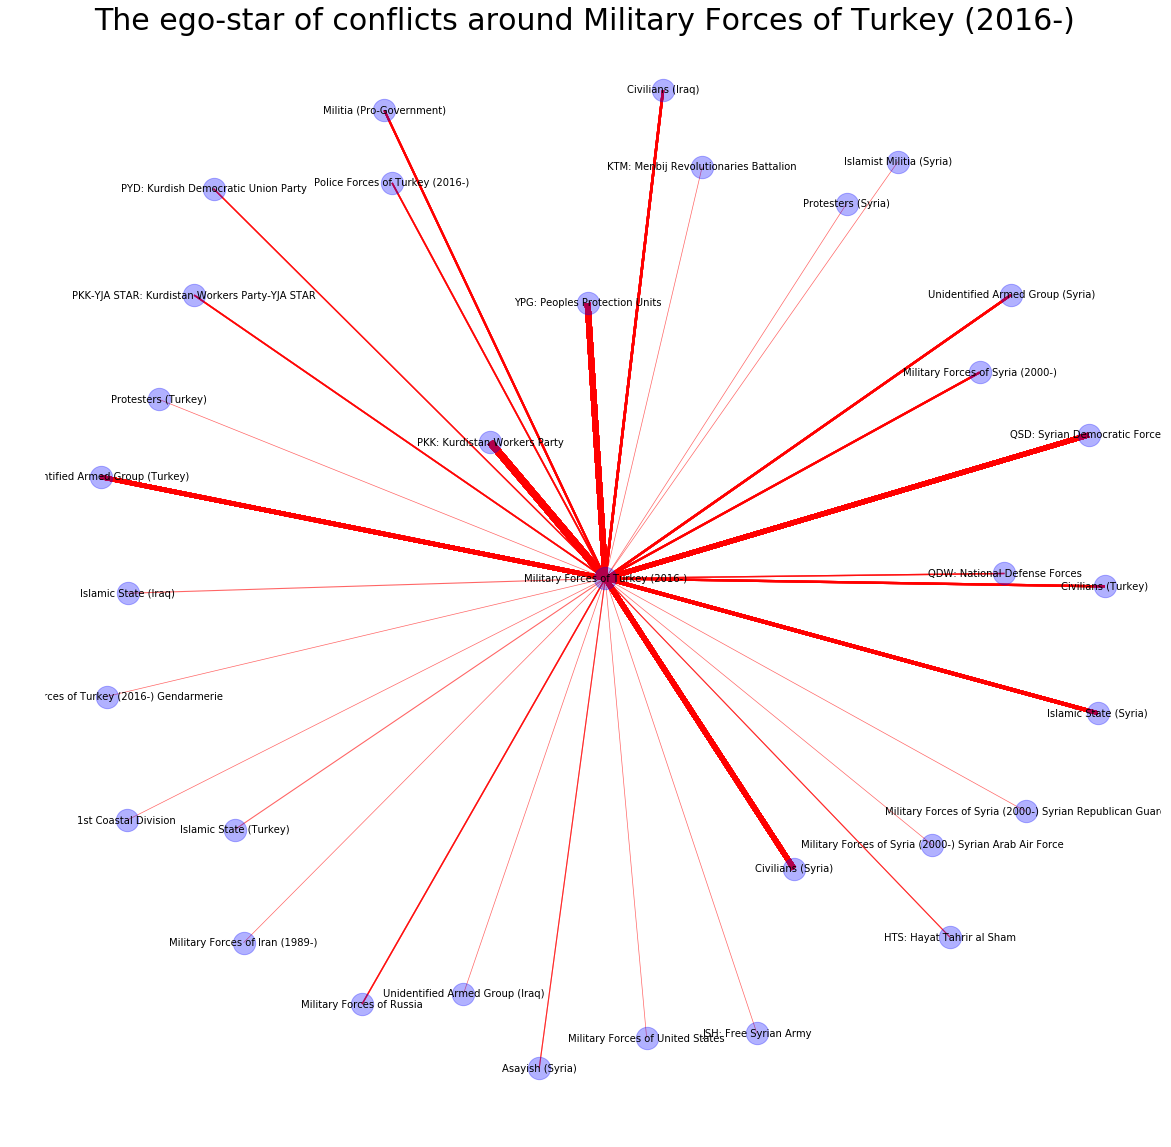

In [30]:
poses=nx.spring_layout(Ges,scale=1.,k=5.)

def centeroidpython(data):
    x, y = zip(*data)
    l = len(x)
    return sum(x) / l, sum(y) / l

data=[v for k,v in poses.items()]
# print centeroidpython(data)

poses[ego] = np.array(centeroidpython(data))
# print pose["Greece"]
for k, v in poses.items():
    if k!=ego:
        ra=np.sqrt((v[0]-poses[ego][0])**2+(v[1]-poses[ego][1])**2)
        if ra<0.2:
            v[0]=v[0]*3.
            v[1]=v[1]*3.
            
edgewidth_es=[]
# colors_es=[]
ewd=defaultdict()
for (u,v,d) in Ges.edges(data=True):
#     edgewidth_es.append(d['weight'])
#     colors_es.append(math.log(d['weight']))
    if (u,v) not in ewd:
        ewd[(u,v)]=[d['weight']]
    else:
        ewd[(u,v)].append(d['weight'])
#     ewd[(u,v)].append(d['weight'])
for (u,v,d) in Ges.edges(data=True):
    edgewidth_es.append(math.log(1+sum(ewd[(u,v)])))
labels_es={}
for i in Ges.nodes():
    labels_es[i]=i
edlabels_es={}
for i in Ges.edges(data=True):
    edlabels_es[(i[0],i[1])]=i[2]['time']
#     print i[2]['EVENT_DATE']
# edlabels_es
plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(Ges,pos=poses,node_size=500,node_color='b',alpha=0.3);
ed=nx.draw_networkx_edges(Ges,pos=poses,edge_color="r",width=edgewidth_es,alpha=0.6); #,arrowsize=20);
# edge_color=colors_es,edge_cmap=plt.cm.cool,width=edgewidth_es,
nx.draw_networkx_labels(Ges,pos=poses,labels=labels_es,font_size=10);  #viridis
# nx.draw_networkx_edge_labels(Ges,pos=poses,edge_labels=edlabels_es)
# plt.colorbar(ed) #, orientation='horizontal')
sst="The ego-star of conflicts around "+ego
plt.suptitle(sst,x=0.5, y=0.9, fontsize=30);
plt.axis('off');
plt.show()

In [31]:
print "The", len(Ges.edges()), "edges/conflicts between", ego, "and alters/combatants have the following attributes:"
print
da=["January-2017","February-2017","March-2017","April-2017","May-2017","June-2017","July-2017",
    "August-2017","September-2017","October-2017","November-2017","December-2017",
   "January-2018","February-2018","March-2018","April-2018","May-2018","June-2018"]
u=0
for d in da:
    for e in Ges.edges(data=True):
        if d in e[2]['time']:
            print "(%i) %s -- %s" %(u+1,ego,e[0])
            u+=1
            print "weight =", e[2]['weight']
            print "event_date =", e[2]['time']
            print "event_type =", e[2]['typeness']
            print

The 1030 edges/conflicts between Military Forces of Turkey (2016-) and alters/combatants have the following attributes:

(1) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 27-January-2017
event_type = Remote violence

(2) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 13-January-2017
event_type = Battle-No change of territory

(3) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 14-January-2017
event_type = Battle-No change of territory

(4) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 3
event_date = 11-January-2017
event_type = Battle-No change of territory

(5) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 23-January-2017
event_type = Remote violence

(6) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 15-January-2017
event_type = Remote violenc

event_type = Battle-No change of territory

(188) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 3
event_date = 28-April-2017
event_type = Battle-No change of territory

(189) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 26-April-2017
event_type = Battle-No change of territory

(190) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 2
event_date = 22-April-2017
event_type = Battle-No change of territory

(191) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 13-April-2017
event_type = Remote violence

(192) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 13-April-2017
event_type = Battle-No change of territory

(193) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 3
event_date = 29-April-2017
event_type = Strategic development

(194) Military Forces of Turkey (2016-) -- PKK: Kurdis

event_type = Remote violence

(334) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 1
event_date = 22-June-2017
event_type = Remote violence

(335) Military Forces of Turkey (2016-) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 18-June-2017
event_type = Battle-No change of territory

(336) Military Forces of Turkey (2016-) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 12-June-2017
event_type = Remote violence

(337) Military Forces of Turkey (2016-) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 10-June-2017
event_type = Remote violence

(338) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_date = 24-July-2017
event_type = Battle-No change of territory

(339) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 4
event_date = 12-July-2017
event_type = Battle-No change of territory

(340) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 1
event_d

(481) Military Forces of Turkey (2016-) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 23-September-2017
event_type = Battle-No change of territory

(482) Military Forces of Turkey (2016-) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 22-September-2017
event_type = Remote violence

(483) Military Forces of Turkey (2016-) -- Military Forces of Turkey (2016-)
weight = 1
event_date = 21-September-2017
event_type = Remote violence

(484) Military Forces of Turkey (2016-) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 10-October-2017
event_type = Strategic development

(485) Military Forces of Turkey (2016-) -- Police Forces of Turkey (2016-)
weight = 1
event_date = 11-October-2017
event_type = Strategic development

(486) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 3
event_date = 22-October-2017
event_type = Battle-No change of territory

(487) Military Forces of Turkey (2016-) -- PKK: Kurdistan Workers Party
weight = 

weight = 2
event_date = 24-January-2018
event_type = Battle-No change of territory

(655) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 3
event_date = 25-January-2018
event_type = Remote violence

(656) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 2
event_date = 25-January-2018
event_type = Battle-Non-state actor overtakes territory

(657) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 2
event_date = 19-January-2018
event_type = Remote violence

(658) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 28-January-2018
event_type = Remote violence

(659) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 1
event_date = 28-January-2018
event_type = Remote violence

(660) Military Forces of Turkey (2016-) -- YPG: Peoples Protection Units
weight = 4
event_date = 30-January-2018
event_type = Battle-No change of territory

(661) Military Fo

weight = 1
event_date = 15-March-2018
event_type = Remote violence

(855) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 1
event_date = 08-March-2018
event_type = Remote violence

(856) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 1
event_date = 02-March-2018
event_type = Remote violence

(857) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 1
event_date = 14-March-2018
event_type = Remote violence

(858) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 3
event_date = 06-March-2018
event_type = Remote violence

(859) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 2
event_date = 03-March-2018
event_type = Remote violence

(860) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 3
event_date = 05-March-2018
event_type = Remote violence

(861) Military Forces of Turkey (2016-) -- Civilians (Syria)
weight = 1
event_date = 16-March-2018
event_type = Remote violence

(862) Military Forces of Turk

## The Bipartite Graph between Timestamps and Egocentric Conflicts

In [32]:
dd={}
for nd in Ges.edges(data=True):
    if nd[0]==ego:
        ed=nd[1]
    else:
        ed=nd[0]
    j=pd.to_datetime(nd[2]['time'])
    if ed not in dd:
        dd[ed]=[(j,nd[2]["weight"])]  #[[j,nd[2]["weight"]]]
    else:
        dd[ed].append((j,nd[2]["weight"]))  #[j,nd[2]["weight"]]
ddd={}
for k,v in dd.items():
    for i,u in enumerate(v):
        ddd[k+str(i)]=u
dds = sorted(ddd.items(), key=operator.itemgetter(1))
dds

[('Civilians (Syria)42', (Timestamp('2017-01-01 00:00:00'), 1)),
 ('PKK: Kurdistan Workers Party363', (Timestamp('2017-01-01 00:00:00'), 1)),
 ('Civilians (Syria)59', (Timestamp('2017-01-02 00:00:00'), 1)),
 ('Islamic State (Syria)7', (Timestamp('2017-01-04 00:00:00'), 1)),
 ('Islamic State (Syria)0', (Timestamp('2017-01-04 00:00:00'), 1)),
 ('PKK: Kurdistan Workers Party356', (Timestamp('2017-01-04 00:00:00'), 1)),
 ('PKK: Kurdistan Workers Party360', (Timestamp('2017-01-06 00:00:00'), 1)),
 ('Islamic State (Syria)15', (Timestamp('2017-01-07 00:00:00'), 1)),
 ('Civilians (Syria)86', (Timestamp('2017-01-10 00:00:00'), 1)),
 ('Civilians (Syria)79', (Timestamp('2017-01-11 00:00:00'), 1)),
 ('PKK: Kurdistan Workers Party222', (Timestamp('2017-01-11 00:00:00'), 3)),
 ('Islamic State (Syria)14', (Timestamp('2017-01-11 00:00:00'), 3)),
 ('QSD: Syrian Democratic Forces27', (Timestamp('2017-01-12 00:00:00'), 1)),
 ('Islamic State (Syria)13', (Timestamp('2017-01-12 00:00:00'), 1)),
 ('PKK: Kurd

In [33]:
sn=[n for n in Ges.nodes() if n!=ego]

cc=Counter()

for nd in dds:
#     print nd
    for kk in sn:
        if nd[0].startswith(kk):
            cc[(kk,nd[1][0])]+=nd[1][1]   #.strftime("%Y-%m")

ccc={"month":[],"neighs":[],"weight":[]}
for k,v in cc.items():
#     print k,v
    ccc["month"].append(k[1])
    ccc["neighs"].append(k[0])
    ccc["weight"].append(v)
# ccc
dfh=pd.DataFrame.from_dict(ccc)
# dfh
dfhg=dfh.groupby(["neighs",pd.Grouper(key='month',freq="M")])["weight"].sum().reset_index().sort_values('month')
# dfhg.rename(columns={'EVENT_DATE': 'No_of_Events'}, inplace=True)
dfhg

neighs      month  weight
82                       QSD: Syrian Democratic Forces 2017-01-31       5
3                                     Civilians (Iraq) 2017-01-31       1
120                      YPG: Peoples Protection Units 2017-01-31       2
33                               Islamic State (Syria) 2017-01-31      18
56                        PKK: Kurdistan Workers Party 2017-01-31      14
11                                   Civilians (Syria) 2017-01-31      32
121                      YPG: Peoples Protection Units 2017-02-28       6
25                                  Civilians (Turkey) 2017-02-28       1
80                                 Protesters (Turkey) 2017-02-28       1
34                               Islamic State (Syria) 2017-02-28      21
57                        PKK: Kurdistan Workers Party 2017-02-28      24
12                                   Civilians (Syria) 2017-02-28       9
83                       QSD: Syrian Democratic Forces 2017-02-28       8
122                      YPG: Peoples Protection Units 2017-03-31       4
38               KTM: Menbij Revolutionaries Battalion 2017-03-31       1
41                    Military Forces of Syria (2000-) 2017-03-31       1
84                       QSD: Syrian Democratic Forces 2017-03-31       4
26                                  Civilians (Turkey) 2017-03-31       4
58                        PKK: Kurdistan Workers Party 2017-03-31      65
98                    Unidentified Armed Group (Syria) 2017-03-31       1
104                  Unidentified Armed Group (Turkey) 2017-03-31       2
13                                   Civilians (Syria) 2017-03-31       4
105                  Unidentified Armed Group (Turkey) 2017-04-30       5
52      PKK-YJA STAR: Kurdistan Workers Party-YJA STAR 2017-04-30       1
99                    Unidentified Armed Group (Syria) 2017-04-30       1
59                        PKK: Kurdistan Workers Party 2017-04-30      86
79                                  Protesters (Syria) 2017-04-30       1
85                       QSD: Syrian Democratic Forces 2017-04-30       2
42                    Military Forces of Syria (2000-) 2017-04-30       1
14                                   Civilians (Syria) 2017-04-30       2
..                                                 ...        ...     ...
97                     Unidentified Armed Group (Iraq) 2018-02-28       1
54      PKK-YJA STAR: Kurdistan Workers Party-YJA STAR 2018-03-31       1
23                                   Civilians (Syria) 2018-03-31      23
51                            Militia (Pro-Government) 2018-03-31       6
116                  Unidentified Armed Group (Turkey) 2018-03-31       2
70                        PKK: Kurdistan Workers Party 2018-03-31      39
95                       QSD: Syrian Democratic Forces 2018-03-31      24
40                           Military Forces of Russia 2018-03-31       3
10                                    Civilians (Iraq) 2018-03-31       2
45                    Military Forces of Syria (2000-) 2018-03-31       3
47   Military Forces of Syria (2000-) Syrian Republ... 2018-03-31       1
49                    Military Forces of United States 2018-03-31       1
131                      YPG: Peoples Protection Units 2018-03-31      67
29                                  Civilians (Turkey) 2018-03-31       1
71                        PKK: Kurdistan Workers Party 2018-04-30      51
2                                      Asayish (Syria) 2018-04-30       1
24                                   Civilians (Syria) 2018-04-30       5
117                  Unidentified Armed Group (Turkey) 2018-04-30       7
32                                Islamic State (Iraq) 2018-04-30       2
36                            Islamist Militia (Syria) 2018-04-30       1
96                       QSD: Syrian Democratic Forces 2018-04-30       3
132                      YPG: Peoples Protection Units 2018-04-30       6
55      PKK-YJA STAR: Kurdistan Workers Party-YJA ST

In [34]:
# sn=[n for n in Ges.nodes() if n!=ego]
print "The number of alters/combatants of", ego, "is", len(sn)
print

B=nx.Graph()
for k,v in cc.items():
    B.add_edge(k[0],k[1].strftime("%Y-%m"),weight=v)

if nx.is_bipartite(B)==True:
    print "The graph between dates of conflict and participating alters/combatants of", ego, "is bipartite"
else:
    print "The graph between dates of conflict and participating alters/combatants of", ego, "is not bipartite"
print

print "The edges of the graph between dates of conflict and participating alters/combatants of %s are:" %ego
print
for e in B.edges(data=True):
    print e

The number of alters/combatants of Military Forces of Turkey (2016-) is 32

The graph between dates of conflict and participating alters/combatants of Military Forces of Turkey (2016-) is bipartite

The edges of the graph between dates of conflict and participating alters/combatants of Military Forces of Turkey (2016-) are:

('Police Forces of Turkey (2016-)', '2017-08', {'weight': 1})
('Police Forces of Turkey (2016-)', '2017-09', {'weight': 1})
('Police Forces of Turkey (2016-)', '2017-10', {'weight': 1})
('2017-03', 'Military Forces of Syria (2000-)', {'weight': 1})
('2017-03', 'PKK: Kurdistan Workers Party', {'weight': 1})
('2017-03', 'Unidentified Armed Group (Turkey)', {'weight': 1})
('2017-03', 'KTM: Menbij Revolutionaries Battalion', {'weight': 1})
('2017-03', 'QSD: Syrian Democratic Forces', {'weight': 1})
('2017-03', 'Civilians (Turkey)', {'weight': 1})
('2017-03', 'Civilians (Syria)', {'weight': 1})
('2017-03', 'Unidentified Armed Group (Syria)', {'weight': 1})
('2017-03', '

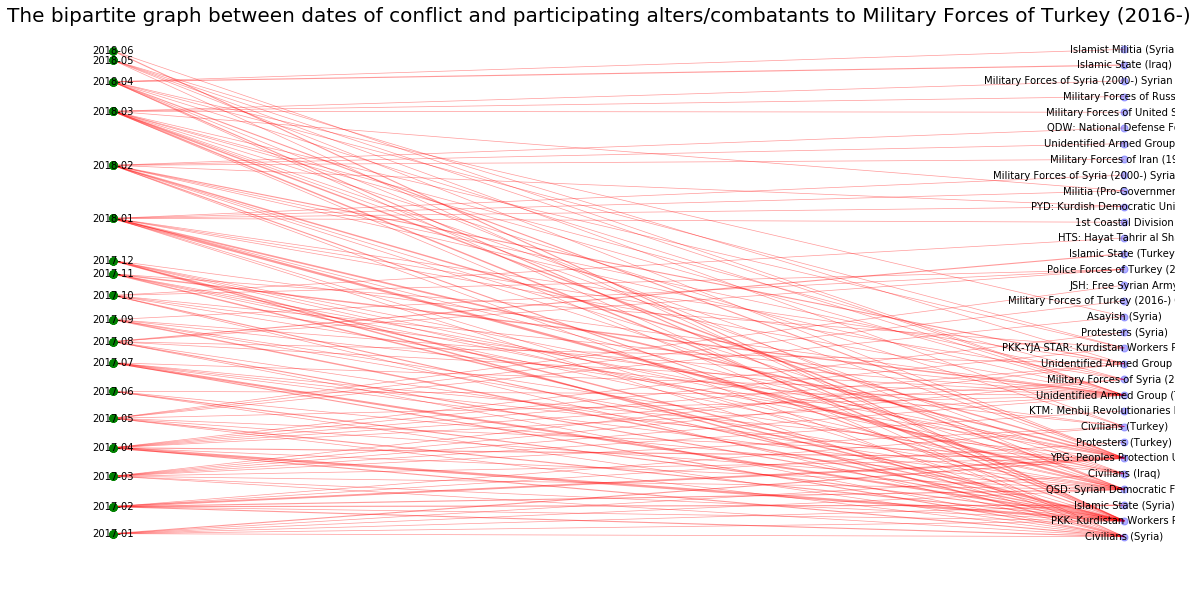

In [35]:
X=[k[1][0].strftime("%Y-%m") for k in dds] #-%d
Xa=[k[1][0].strftime("%Y-%m-%d") for k in dds] #
Y=[]
for k in dds:
    for kk in sn:
        if k[0].startswith(kk):
            if kk not in Y:
                Y.append(kk)
# print len(X),len(Y)
posB = dict()
posB.update( (n, (1, i)) for i, n in enumerate(X) ) 
posB.update( (n, (2, 40+i*len(Y))) for i, n in enumerate(Y) )
posB
edgewidthB=[]
for (u,v,d) in B.edges(data=True):
    edgewidthB.append(math.log(1+d['weight']))
plt.figure(figsize=(20,10))
# nx.draw(B, pos=posB)
labelsB={}
for i in B.nodes():
    labelsB[i]=i
nx.draw_networkx_nodes(B,pos=posB,nodelist=X,node_size=50,node_color='g',alpha=0.3);    
nx.draw_networkx_nodes(B,pos=posB,nodelist=Y,node_size=50,node_color='b',alpha=0.3);   
ed=nx.draw_networkx_edges(B,pos=posB,edgelist=B.edges(),width=edgewidthB,edge_color="r",alpha=0.4); 
nx.draw_networkx_labels(B,pos=posB,labels=labelsB,font_size=10);
sst="The bipartite graph between dates of conflict and participating alters/combatants to "+ego
plt.suptitle(sst,x=0.5, y=.90, fontsize=20);
plt.axis('off');
plt.show()

## The Time Variation of Egocentric Conflicts

In [36]:
dg=dfhg.to_dict()
bars={k:[] for k in dg["neighs"].values()}
dates=[]
datesd={k:[] for k in dg["month"].values()}
neighs={k:[] for k in dg["month"].values()}
for k,v in dg["month"].items():
    datesd[v].append(k)
    neighs[v].append(dg["neighs"][k])
for k in sorted(datesd):
    ssn=set()
#     for kk in sn:
    for i,kk in enumerate(neighs[k]):
        bars[kk].append(dg["weight"][datesd[k][i]])
        ssn.add(kk)
    ssn=set(sn)-ssn
    for kk in ssn:
        bars[kk].append(0)
    dates.append(k.strftime("%Y-%m"))
# print bars
# dates

In [37]:
# from matplotlib import rc
# from matplotlib import colors as mcolors
# colors=dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)  # Sort colors by hue, saturation, value and name. 
# by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name) for name, color in colors.items()) 
# sorted_names = [name for hsv, name in by_hsv]
# sorted_names

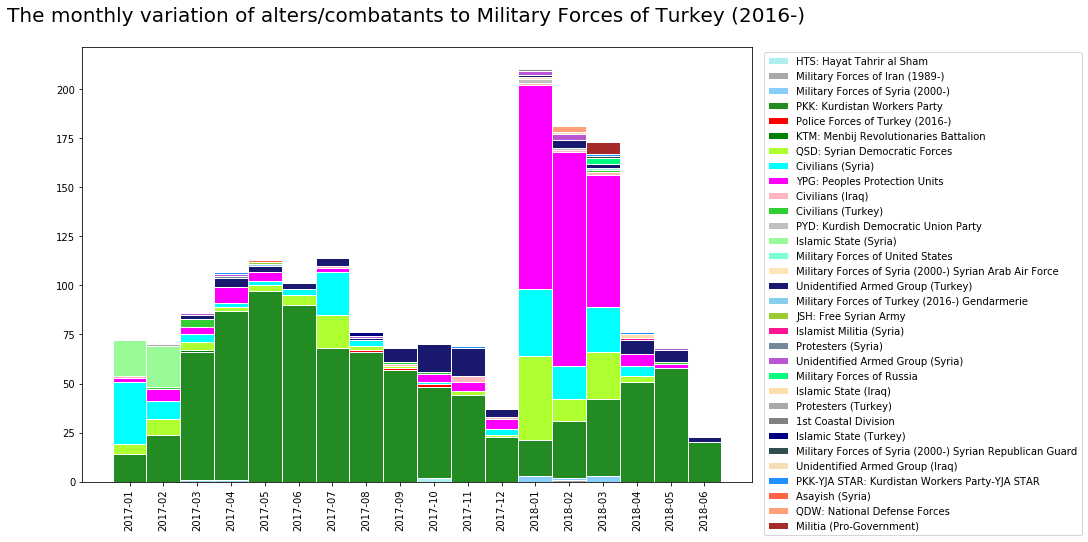

In [38]:
# libraries
# colors=dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)  # Sort colors by hue, saturation, value and name. 
# by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name) for name, color in colors.items()) 

excl=['white','antiquewhite','ivory','cornsilk','snow','honeydew','ghostwhite','whitesmoke',
     'aliceblue','lavenderblush','azure','linen','lightcyan','floralwhite','papayawhip',
     'peachpuff','beige','bisque','dimgray','dimgrey','black','slategrey','slategray']
bco=[name for name, hex in mpl.colors.cnames.iteritems() if name not in excl]
random.shuffle(bco)
# print bco

# mycolors=[c for c in mycolors if c not in excl]
# sorted_names = mycolors #[name for hsv, name in by_hsv][20:]
sorted_names = bco #mycolors #[name for hsv, name in by_hsv][20:]


# y-axis in bold
# rc('font', weight='bold')
 
# Values of each group

# Heights of bars1 + bars2 (TO DO better)
# bars = [40, 35, 17, 12, 32]
 
# The position of the bars on the x-axis
r = range(len(dates)) #[0,1,2,3,4]
 
# Names of group and bar width
names = [d for d in dates] #.strftime("%Y-%m")  ['A','B','C','D','E']
barWidth = 1
 
plt.figure(figsize=(12,8))
# print len(names)
# Create brown bars
u=0
ch=None
for k,v in bars.items():
#     print u,sol # k,v,len(v)
#     plt.barh(r,height=v,color=sorted_names[u], edgecolor='white', width=barWidth)
    if ch==None: #sol==None:
        plt.bar(r,v,color=sorted_names[u], edgecolor='white', width=barWidth,label=k)
        sol=np.array(v)
        ch=3
    else:
        plt.bar(r,v,color=sorted_names[u], edgecolor='white', width=barWidth,label=k,bottom=sol)
        sol+=np.array(v)
    u+=1
plt.legend(bbox_to_anchor=(1.5, 1.), loc='upper right', ncol=1) #0.5, -1.5
# plt.legend()
# plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
# plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names,rotation=90) #, fontweight='bold')
# plt.xlabel("group")
sst="The monthly variation of alters/combatants to "+ego
plt.suptitle(sst,x=0.5, y=.95, fontsize=20);
# Show graphic
plt.show()


In [39]:
# me={}
# for e in B.edges(data=True):
#     if e[0].startswith("20"):
#         ed=e[0]
#         de=e[1]
#     else:
#         ed=e[1]
#         de=e[0]
#     if ed not in me:
#         me[ed]=[(de,e[2]['weight'])]
#     else:
#         me[ed].append((de,e[2]['weight']))
# for k in sorted(me.keys()):
#     print k, me[k]
#     print